# **Name:**  Isra Mansoor
# **Cms:**   404520
# **Class:** BSCS-12A
# **Assignment:** Predicting Patient Dropout from a Long-Term Health Treatment Program

# **1.** **Imports**

The following code imports essential libraries for data manipulation (Pandas, NumPy), visualization (Matplotlib, Seaborn), and machine learning (scikit-learn, statsmodels), facilitating the analysis and modeling process. Additionally, it includes a mechanism to suppress warnings for cleaner output.

In [1515]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.impute import SimpleImputer
from scipy.stats import zscore
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import log_loss
from sklearn.preprocessing import StandardScaler

# Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Warnings (optional)
import warnings
warnings.filterwarnings('ignore')

# **2.** **Data Exploration and Preprocessing**

## **2.1.** Loading Dataset

### **2.1.1.** Loading and Displaying Data

The following code **loads** the patient dropout dataset from a CSV file and **displays** the first 20 rows of the dataset to give a glimpse of the data structure and values.

In [1516]:
# Load the dataset
data = pd.read_csv('/kaggle/input/data-patient-dropout/data_patient_dropout.csv')

# Display the dataset
data.head(20)

,Patient ID,Initial Consultation Attended,Number of Treatment Sessions Attended,Number of Treatment Goals Set,Number of Treatment Goals Revised,Number of Progress Reviews Attended,Number of Times Treatment Plan Confirmed,Number of Times Treatment Phase Initiated,Number of Treatment Options Explored,Number of Times Logged Into Health Portal,Number of Educational Resources Viewed,Patient Segment Type,Treatment Dropped
0,ID_0,Yes,4,1.0,0,0.0,0,0,1,0,0,0,1
1,ID_1,No,38,0.0,0,2.0,0,0,2,0,2,0,1
2,ID_2,No,8,5.0,0,0.0,1,1,1,0,0,1,0
3,ID_3,No,6,0.0,0,2.0,0,0,4,0,0,0,1
4,ID_4,Yes,31,14.0,12,1.0,0,0,4,0,0,2,1
5,ID_5,Yes,13,6.0,0,0.0,0,1,1,0,5,1,1
6,ID_6,No,14,4.0,1,0.0,1,1,1,0,0,1,0
7,ID_7,No,7,1.0,0,NaN,0,1,1,0,3,0,1
8,ID_8,No,13,8.0,1,NaN,0,0,1,0,1,1,1
9,ID_9,No,17,4.0,1,NaN,1,2,2,1,1,1,0


As we can see in the table above, there are a lot of missing values in the table especially in the column named **Number of Progress Reviews Attended** and **Number of Treatment Goals Set** therefore we need to clean up the dataset by handling missing values.

### **2.1.2.** Data Info

The following code displays the **column names** along with the **datatypes** of each column. Our model understands numbers only so we will have to remove the object datatypes by either converting them to numbers or by removing them altogether. We also get to see a glimpse of the **count**, **mean**, **std**, **min**, **25%**, **50%**, **75%** and **max** values in each attribute

In [1517]:
data.info()
print('\n\n')
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4284 entries, 0 to 4283
Data columns (total 13 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Patient ID                                 4284 non-null   object 
 1   Initial Consultation Attended              4284 non-null   object 
 2   Number of Treatment Sessions Attended      4284 non-null   int64  
 3   Number of Treatment Goals Set              4275 non-null   float64
 4   Number of Treatment Goals Revised          4284 non-null   int64  
 5   Number of Progress Reviews Attended        4275 non-null   float64
 6   Number of Times Treatment Plan Confirmed   4284 non-null   int64  
 7   Number of Times Treatment Phase Initiated  4284 non-null   int64  
 8   Number of Treatment Options Explored       4284 non-null   int64  
 9   Number of Times Logged Into Health Portal  4284 non-null   int64  
 10  Number of Educational Re

,Number of Treatment Sessions Attended,Number of Treatment Goals Set,Number of Treatment Goals Revised,Number of Progress Reviews Attended,Number of Times Treatment Plan Confirmed,Number of Times Treatment Phase Initiated,Number of Treatment Options Explored,Number of Times Logged Into Health Portal,Number of Educational Resources Viewed,Patient Segment Type,Treatment Dropped
count,4284.000000,4275.000000,4284.000000,4275.000000,4284.000000,4284.000000,4284.000000,4284.000000,4284.000000,4284.000000,4284.000000
mean,13.878151,3.488421,0.867180,1.444211,0.187208,0.980159,2.295985,0.169234,2.348506,0.563259,0.856209
std,15.934084,6.789401,3.070022,2.082496,0.517691,1.140525,6.052666,0.400299,2.868862,0.703856,0.350918
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
50%,10.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,2.000000,0.000000,1.000000
75%,17.000000,5.000000,0.000000,2.000000,0.000000,1.000000,2.000000,0.000000,3.000000,1.000000,1.000000
max,436.000000,225.000000,50.000000,34.000000,11.000000,14.000000,256.000000,3.000000,35.000000,2.000000,1.000000


### **2.1.3.** Data Visualization

The histograms display the **distribution** of various features related to patient treatment metrics, showing a majority of values concentrated at low counts, indicative of a right-skewed distribution. The last plot suggests a binary classification for "Treatment Dropped," with a notable concentration of values at 1 (indicating treatment dropped).

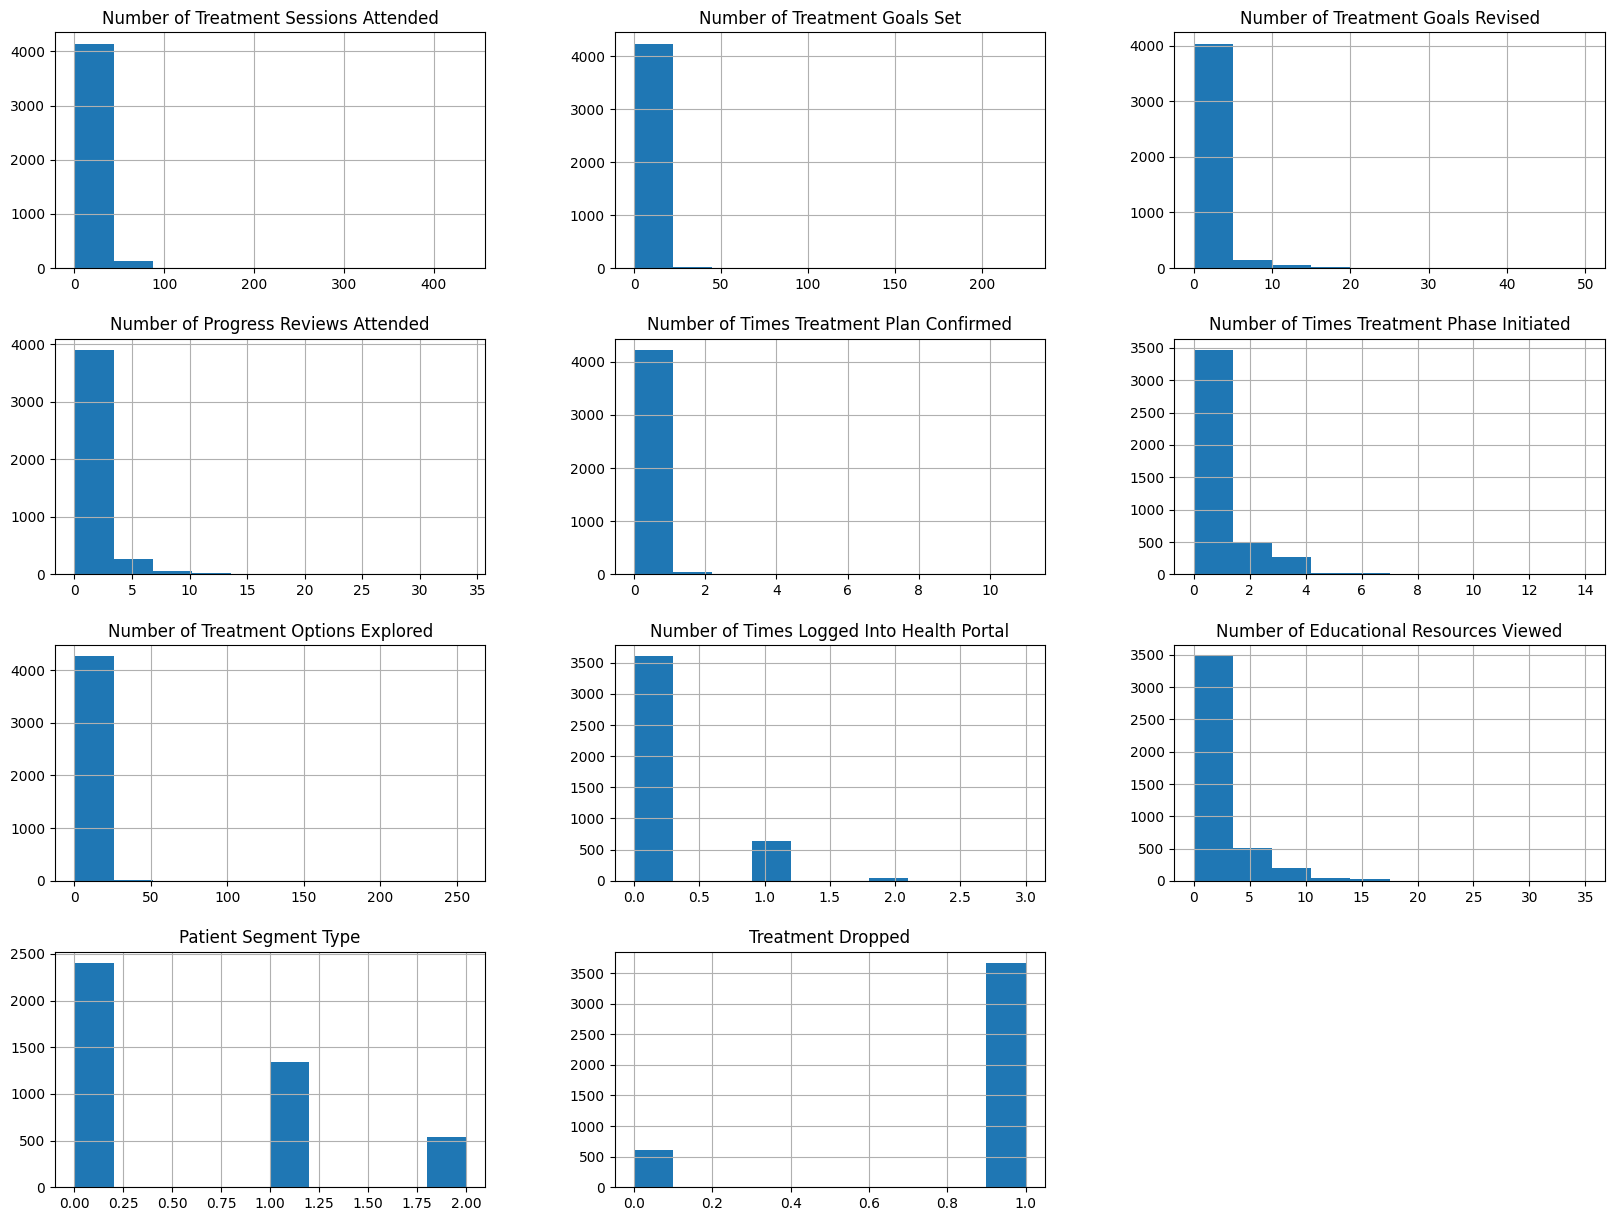

In [1518]:
data.hist(figsize=(20,15))
plt.show()

## **2.2.** Handling Missing Values

### **2.2.1.** Checking missing values

In [1519]:
# Check any missing values
data.isnull().sum()

Patient ID                                   0
Initial Consultation Attended                0
Number of Treatment Sessions Attended        0
Number of Treatment Goals Set                9
Number of Treatment Goals Revised            0
Number of Progress Reviews Attended          9
Number of Times Treatment Plan Confirmed     0
Number of Times Treatment Phase Initiated    0
Number of Treatment Options Explored         0
Number of Times Logged Into Health Portal    0
Number of Educational Resources Viewed       0
Patient Segment Type                         0
Treatment Dropped                            0
dtype: int64

From the above information we can see that there are **9** missing values in **Number of Progress Reviews Attended** and **9** missing values in **Number of Treatment Goals Set**

### **2.2.2.** Immutating and removing missing values

The following code identifies and removes rows with missing values in both the **'Number of Treatment Goals Set'** and **'Number of Progress Reviews Attended'** columns from the dataset. It then imputes any remaining missing values in these columns by replacing them with the respective column median, ensuring the dataset is clean and ready for analysis.

In [1520]:
# Identify rows with missing values in both columns
intersecting_rows = data[data['Number of Treatment Goals Set'].isnull() & data['Number of Progress Reviews Attended'].isnull()]

# Drop intersecting rows 
data_cleaned = data.drop(intersecting_rows.index)

# Impute missing values in Number of Treatment Goals Set and Number of Progress Reviews Attended
# Replace missing values in Number of Treatment Goals Set with the median of that column
if data_cleaned['Number of Treatment Goals Set'].isnull().sum() > 0:
    median_value_Number_of_Treatment_Goals_Set = data_cleaned['Number of Treatment Goals Set'].median()
    data_cleaned['Number of Treatment Goals Set'].fillna(median_value_Number_of_Treatment_Goals_Set, inplace=True)

# Replace missing values in Number of Progress Reviews Attended with the median of that column
if data_cleaned['Number of Progress Reviews Attended'].isnull().sum() > 0:
    median_value_Number_of_Progress_Reviews_Attended = data_cleaned['Number of Progress Reviews Attended'].median()
    data_cleaned['Number of Progress Reviews Attended'].fillna(median_value_Number_of_Progress_Reviews_Attended, inplace=True)

# Display the cleaned data
print("\nCleaned Data")
data_cleaned


Cleaned Data


,Patient ID,Initial Consultation Attended,Number of Treatment Sessions Attended,Number of Treatment Goals Set,Number of Treatment Goals Revised,Number of Progress Reviews Attended,Number of Times Treatment Plan Confirmed,Number of Times Treatment Phase Initiated,Number of Treatment Options Explored,Number of Times Logged Into Health Portal,Number of Educational Resources Viewed,Patient Segment Type,Treatment Dropped
0,ID_0,Yes,4,1.0,0,0.0,0,0,1,0,0,0,1
1,ID_1,No,38,0.0,0,2.0,0,0,2,0,2,0,1
2,ID_2,No,8,5.0,0,0.0,1,1,1,0,0,1,0
3,ID_3,No,6,0.0,0,2.0,0,0,4,0,0,0,1
4,ID_4,Yes,31,14.0,12,1.0,0,0,4,0,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4279,ID_4279,Yes,23,5.0,6,2.0,0,0,3,0,7,2,1
4280,ID_4280,No,7,2.0,0,3.0,0,0,1,0,0,0,1
4281,ID_4281,No,4,1.0,0,1.0,0,1,1,0,0,0,1
4282,ID_4282,No,8,3.0,0,1.0,0,1,1,0,2,1,1


In the above code there is **deletion** of all rows which had more than one missing value (NAN) and **replacement** of all other missing values with the median value of their respective column.

### **2.2.3.** Checking missing values after handling missing values

In [1521]:
# Check any missing values
data_cleaned.isnull().sum()

Patient ID                                   0
Initial Consultation Attended                0
Number of Treatment Sessions Attended        0
Number of Treatment Goals Set                0
Number of Treatment Goals Revised            0
Number of Progress Reviews Attended          0
Number of Times Treatment Plan Confirmed     0
Number of Times Treatment Phase Initiated    0
Number of Treatment Options Explored         0
Number of Times Logged Into Health Portal    0
Number of Educational Resources Viewed       0
Patient Segment Type                         0
Treatment Dropped                            0
dtype: int64

All the missing values are gone as indicated by **0** in each attribute

## **2.3.** Dropping unnecessary columns

This code drops the 'Patient ID' column from the cleaned dataset, which is often unnecessary for analysis as it does not provide meaningful information for modeling. Removing this column helps streamline the dataset and reduces potential noise in the analysis.

In [1522]:
# Drop column Patient ID
data_cleaned = data_cleaned.drop(columns=['Patient ID'])

## **2.4.** Feature Scaling

This code selects specific numerical columns from the cleaned dataset and applies Min-Max scaling to standardize their values between 0 and 1, improving the performance of machine learning algorithms. The transformed data is then displayed to verify the scaling.


In [1523]:
# Selecting only the numerical columns
numeric_cols = [
    'Number of Treatment Sessions Attended',
    'Number of Treatment Goals Set',
    'Number of Treatment Goals Revised',
    'Number of Progress Reviews Attended',
    'Number of Times Treatment Plan Confirmed',
    'Number of Times Treatment Phase Initiated',
    'Number of Treatment Options Explored',
    'Number of Times Logged Into Health Portal',
    'Number of Educational Resources Viewed',
    'Patient Segment Type',
    'Treatment Dropped'
]

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Perform Min-Max scaling on the numeric columns
data_cleaned[numeric_cols] = scaler.fit_transform(data_cleaned[numeric_cols])

# Display the first few rows of the scaled DataFrame
print("Scaled Data \n")
data_cleaned

Scaled Data 



,Initial Consultation Attended,Number of Treatment Sessions Attended,Number of Treatment Goals Set,Number of Treatment Goals Revised,Number of Progress Reviews Attended,Number of Times Treatment Plan Confirmed,Number of Times Treatment Phase Initiated,Number of Treatment Options Explored,Number of Times Logged Into Health Portal,Number of Educational Resources Viewed,Patient Segment Type,Treatment Dropped
0,Yes,0.009174,0.004444,0.00,0.000000,0.000000,0.000000,0.003906,0.0,0.000000,0.0,1.0
1,No,0.087156,0.000000,0.00,0.058824,0.000000,0.000000,0.007812,0.0,0.057143,0.0,1.0
2,No,0.018349,0.022222,0.00,0.000000,0.090909,0.071429,0.003906,0.0,0.000000,0.5,0.0
3,No,0.013761,0.000000,0.00,0.058824,0.000000,0.000000,0.015625,0.0,0.000000,0.0,1.0
4,Yes,0.071101,0.062222,0.24,0.029412,0.000000,0.000000,0.015625,0.0,0.000000,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4279,Yes,0.052752,0.022222,0.12,0.058824,0.000000,0.000000,0.011719,0.0,0.200000,1.0,1.0
4280,No,0.016055,0.008889,0.00,0.088235,0.000000,0.000000,0.003906,0.0,0.000000,0.0,1.0
4281,No,0.009174,0.004444,0.00,0.029412,0.000000,0.071429,0.003906,0.0,0.000000,0.0,1.0
4282,No,0.018349,0.013333,0.00,0.029412,0.000000,0.071429,0.003906,0.0,0.057143,0.5,1.0


## **2.5.** Encoding Categorical Variables

Checking to see how many categories we have in the object datatype Initial Consultation Attended

In [1524]:
data['Initial Consultation Attended'].value_counts()

Initial Consultation Attended
No     3074
Yes    1210
Name: count, dtype: int64

In [1525]:
data['Patient Segment Type'].value_counts()

Patient Segment Type
0    2405
1    1345
2     534
Name: count, dtype: int64

The following code creates a new DataFrame and performs one-hot encoding on the 'Initial Consultation Attended' column, transforming it into two binary columns. It also converts the boolean values in these new columns to integers (0 and 1) for easier numerical analysis and compatibility with machine learning algorithms.

In [1526]:
# Creating dataframe
data_cleaned = pd.DataFrame(data_cleaned)

# Perform one-hot encoding on the 'Initial Consultation Attended' column
one_hot = pd.get_dummies(data_cleaned['Initial Consultation Attended'], prefix='Initial Consultation Attended', drop_first=False)

# Concatenate the one-hot encoded columns with the original DataFrame
data_cleaned = pd.concat([data_cleaned.drop('Initial Consultation Attended', axis=1), one_hot], axis=1)

# Convert boolean values to integers (1 for True, 0 for False)
data_cleaned['Initial Consultation Attended_No'] = data_cleaned['Initial Consultation Attended_No'].astype(int)
data_cleaned['Initial Consultation Attended_Yes'] = data_cleaned['Initial Consultation Attended_Yes'].astype(int)

# Display the updated DataFrame
print("Updated Data with Numerical Encoding \n")
data_cleaned

Updated Data with Numerical Encoding 



,Number of Treatment Sessions Attended,Number of Treatment Goals Set,Number of Treatment Goals Revised,Number of Progress Reviews Attended,Number of Times Treatment Plan Confirmed,Number of Times Treatment Phase Initiated,Number of Treatment Options Explored,Number of Times Logged Into Health Portal,Number of Educational Resources Viewed,Patient Segment Type,Treatment Dropped,Initial Consultation Attended_No,Initial Consultation Attended_Yes
0,0.009174,0.004444,0.00,0.000000,0.000000,0.000000,0.003906,0.0,0.000000,0.0,1.0,0,1
1,0.087156,0.000000,0.00,0.058824,0.000000,0.000000,0.007812,0.0,0.057143,0.0,1.0,1,0
2,0.018349,0.022222,0.00,0.000000,0.090909,0.071429,0.003906,0.0,0.000000,0.5,0.0,1,0
3,0.013761,0.000000,0.00,0.058824,0.000000,0.000000,0.015625,0.0,0.000000,0.0,1.0,1,0
4,0.071101,0.062222,0.24,0.029412,0.000000,0.000000,0.015625,0.0,0.000000,1.0,1.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4279,0.052752,0.022222,0.12,0.058824,0.000000,0.000000,0.011719,0.0,0.200000,1.0,1.0,0,1
4280,0.016055,0.008889,0.00,0.088235,0.000000,0.000000,0.003906,0.0,0.000000,0.0,1.0,1,0
4281,0.009174,0.004444,0.00,0.029412,0.000000,0.071429,0.003906,0.0,0.000000,0.0,1.0,1,0
4282,0.018349,0.013333,0.00,0.029412,0.000000,0.071429,0.003906,0.0,0.057143,0.5,1.0,1,0


## **2.6.** Outlier Detection

### **2.6.1.** Boxplot before removing outliers

This code selects all numerical columns from the cleaned DataFrame and generates histograms and boxplots for each column to visualize the distribution and identify outliers. The boxplots display the data before any outlier removal, allowing for a comparative analysis of the data's spread and potential anomalies.

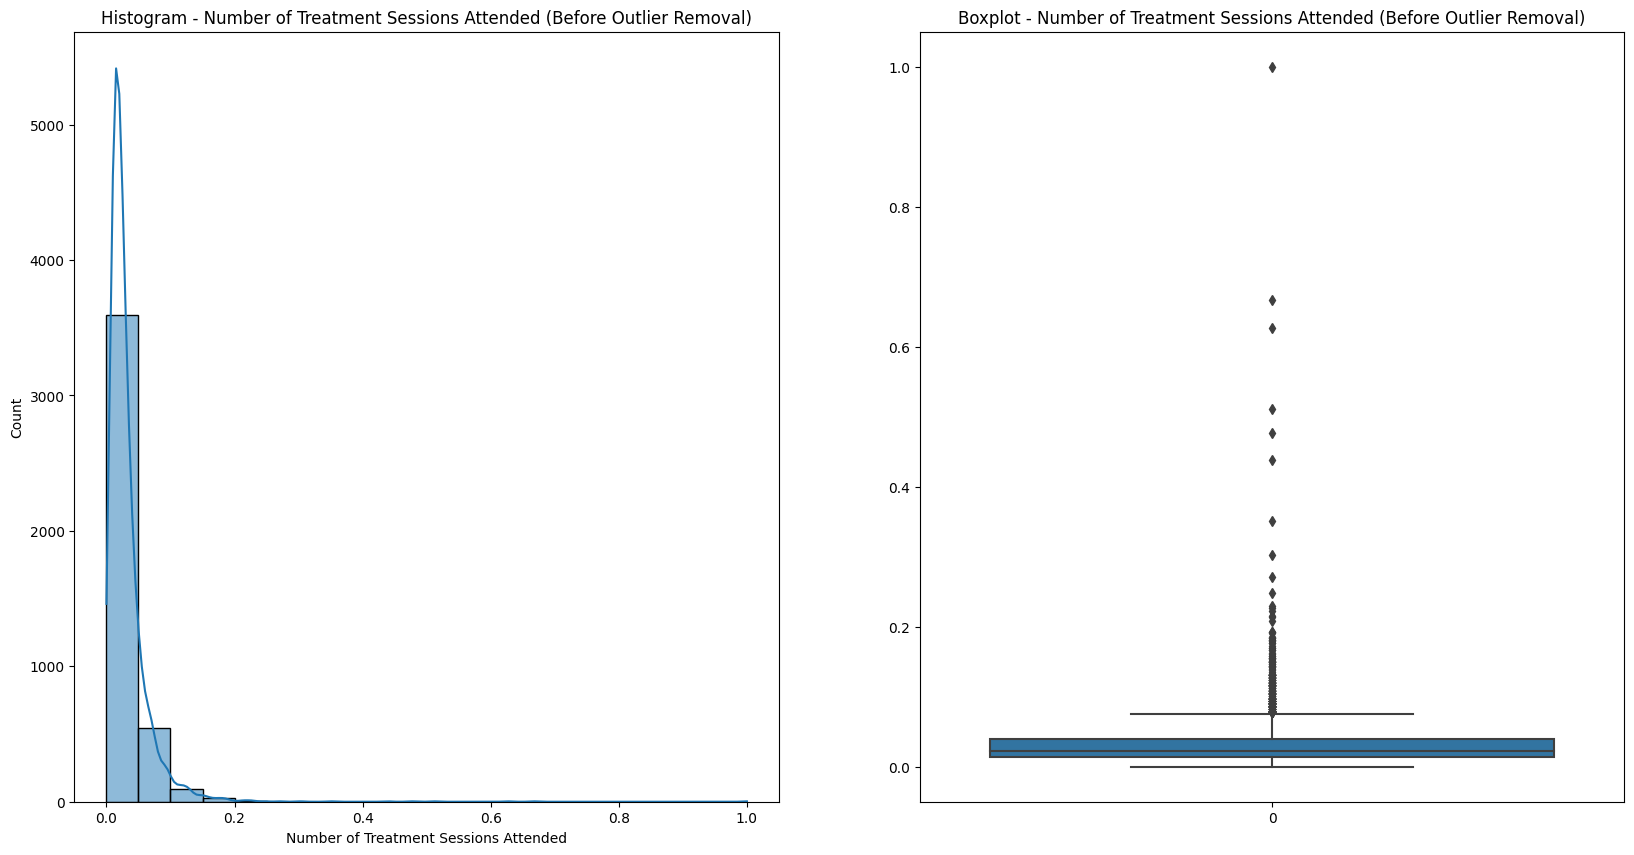

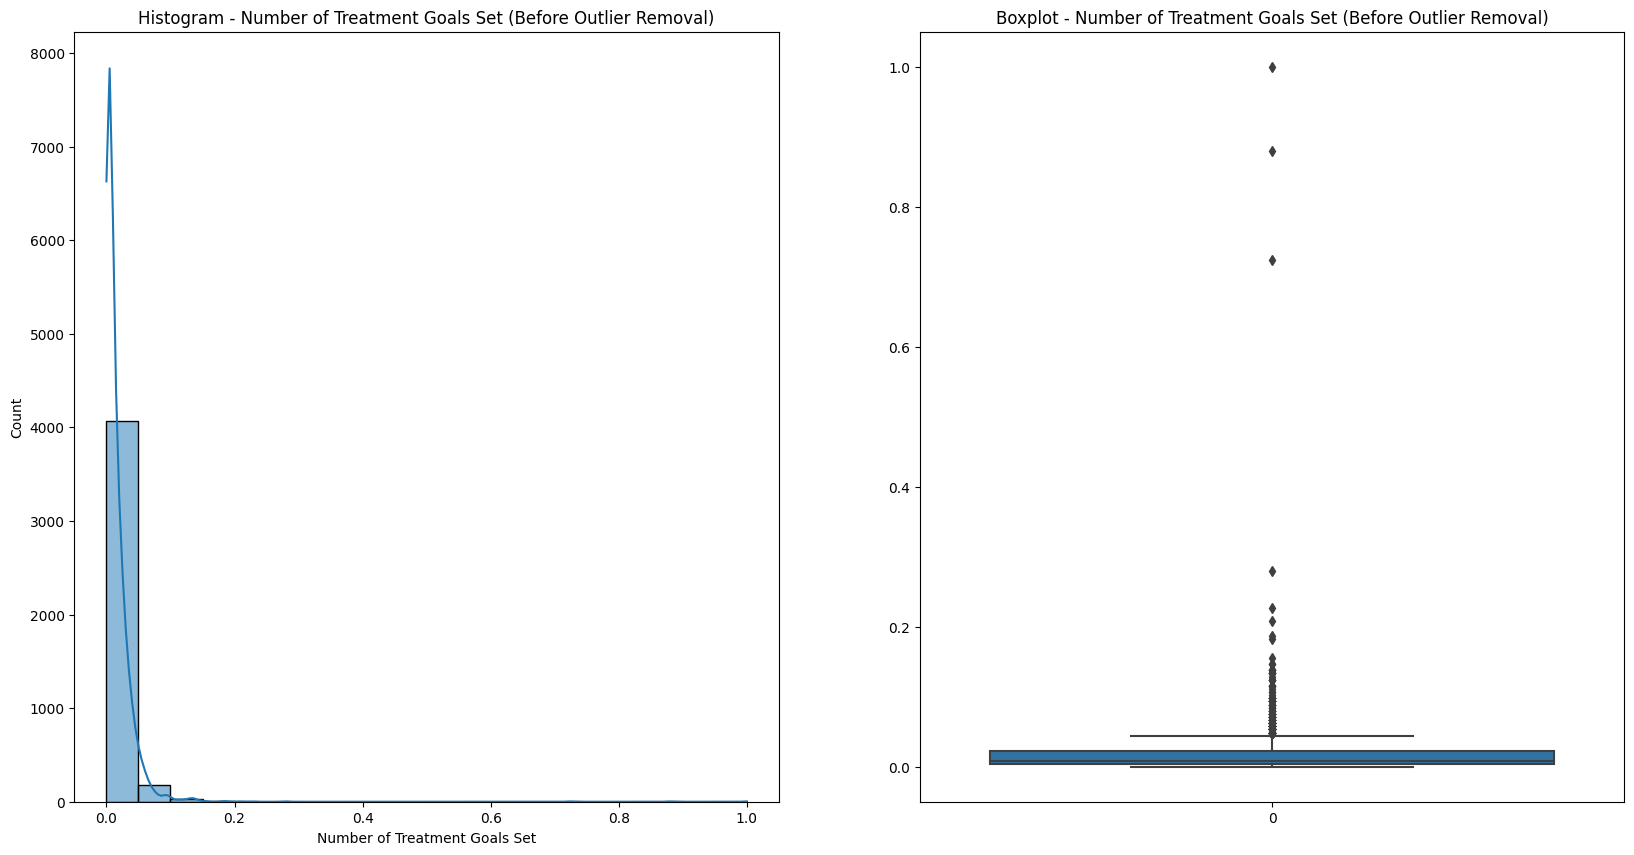

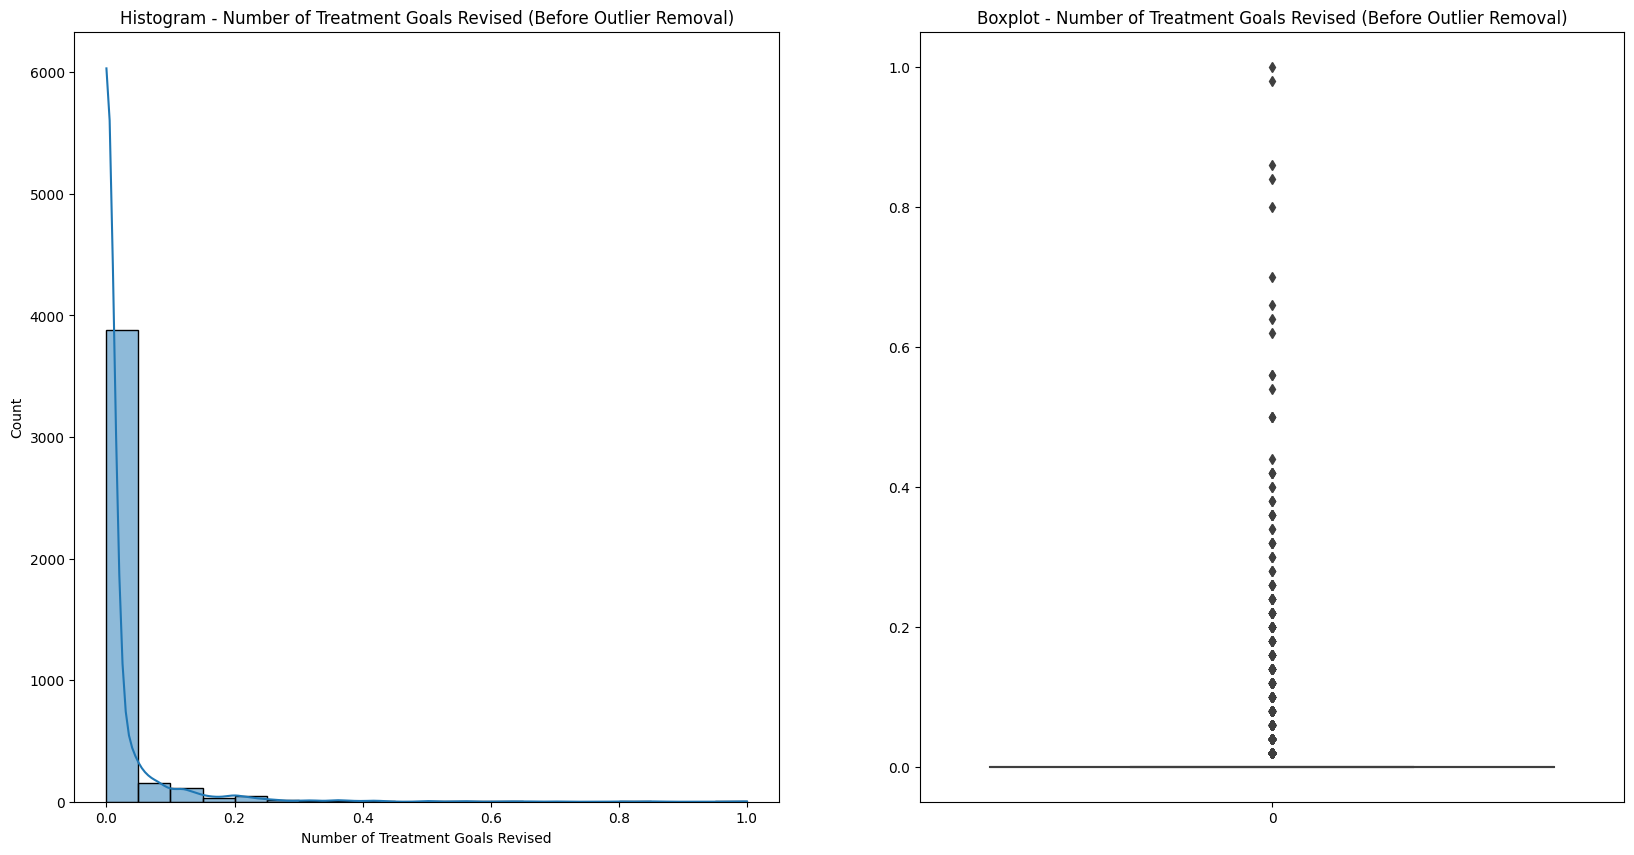

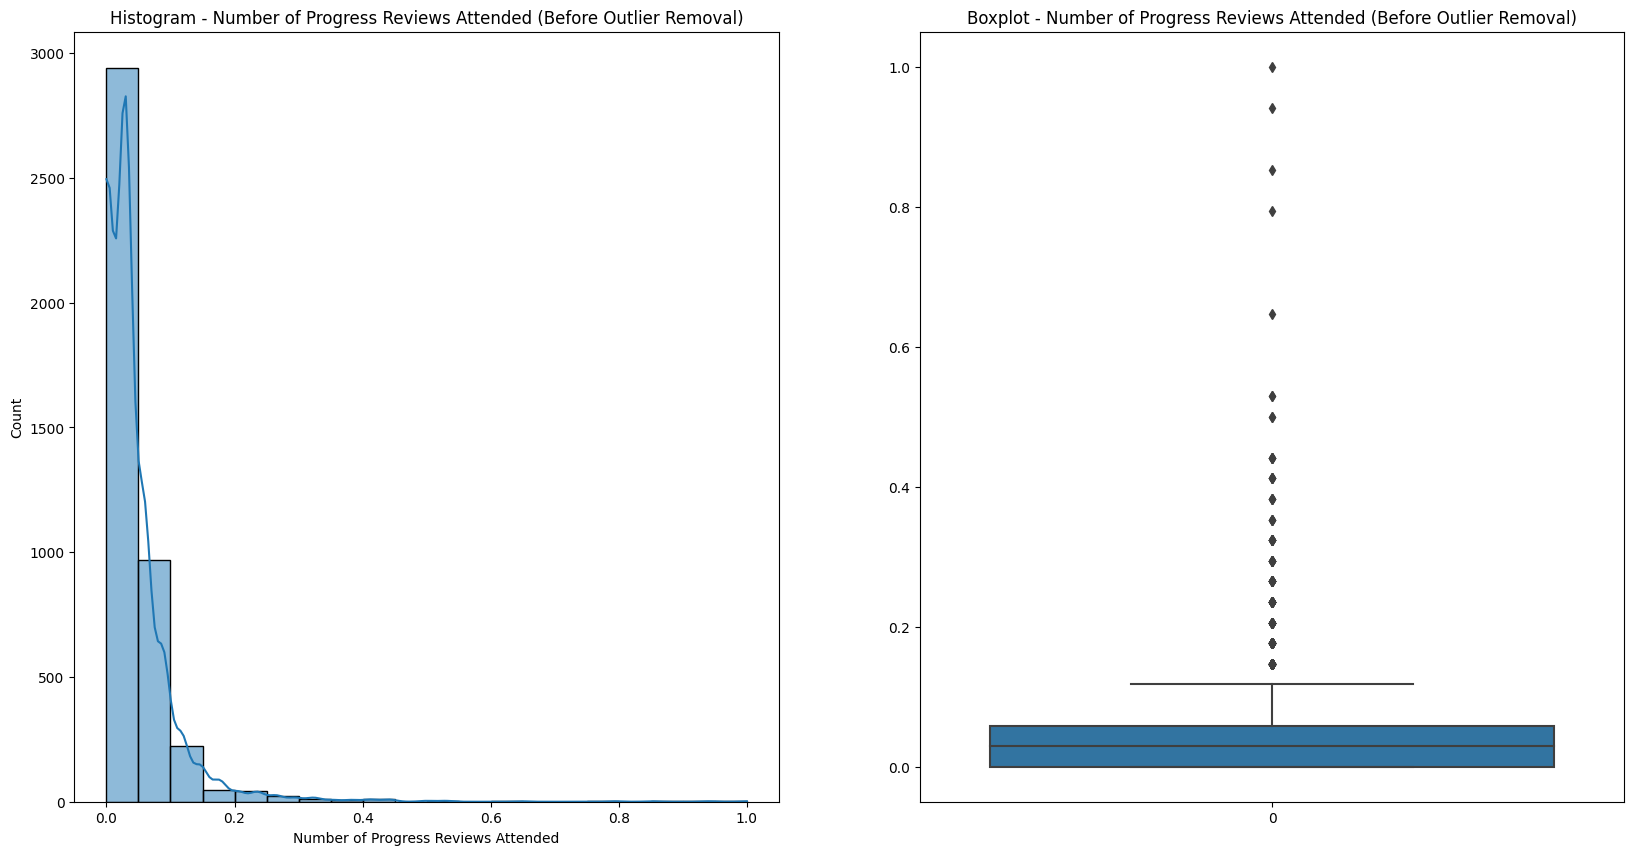

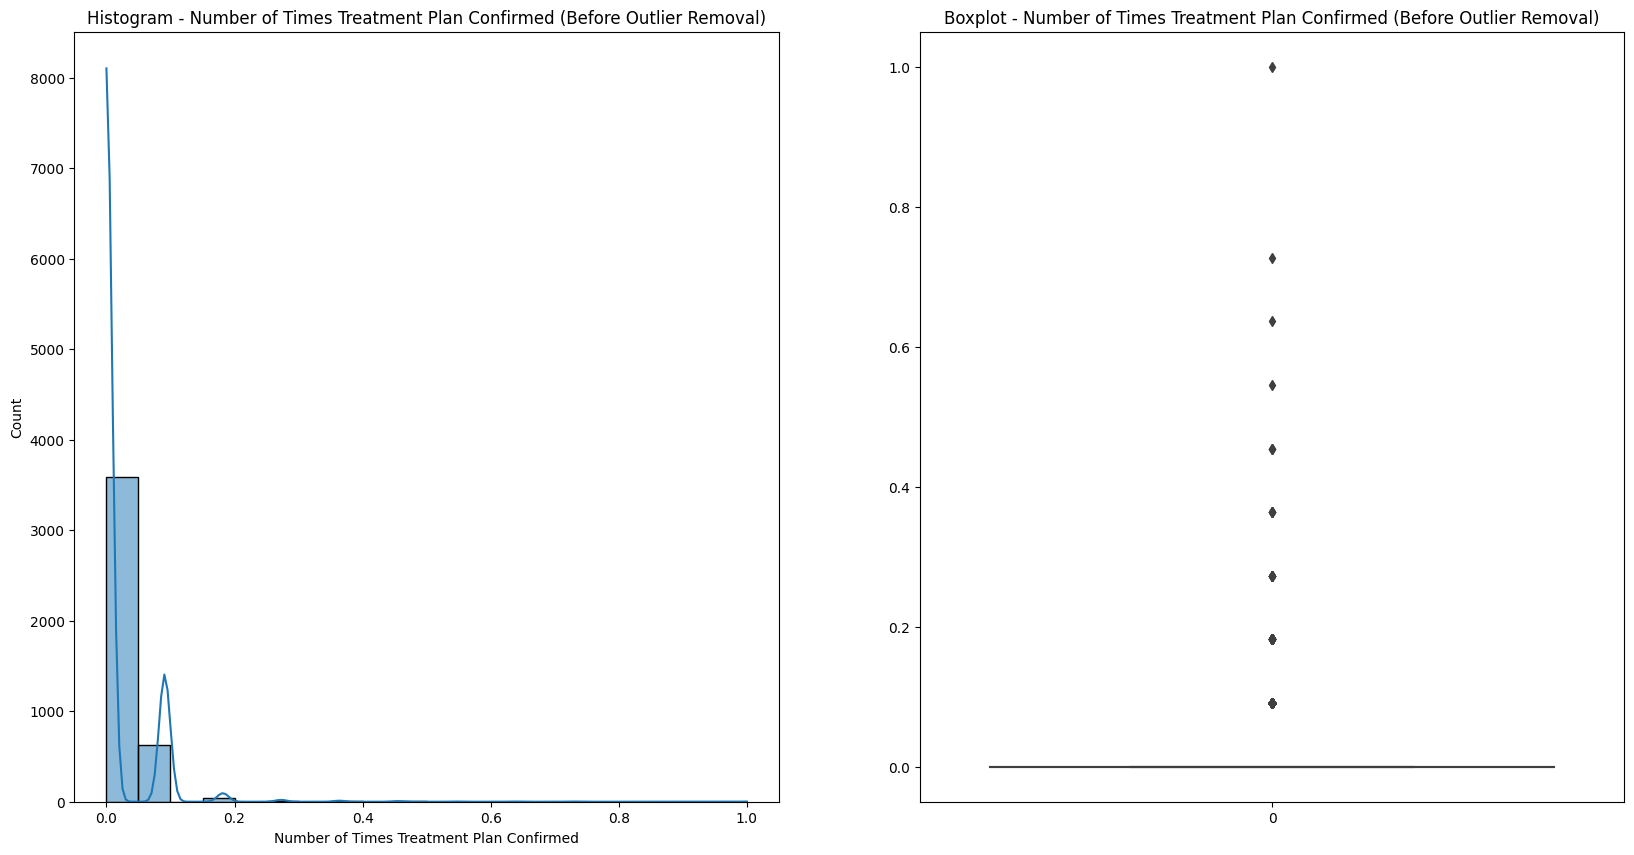

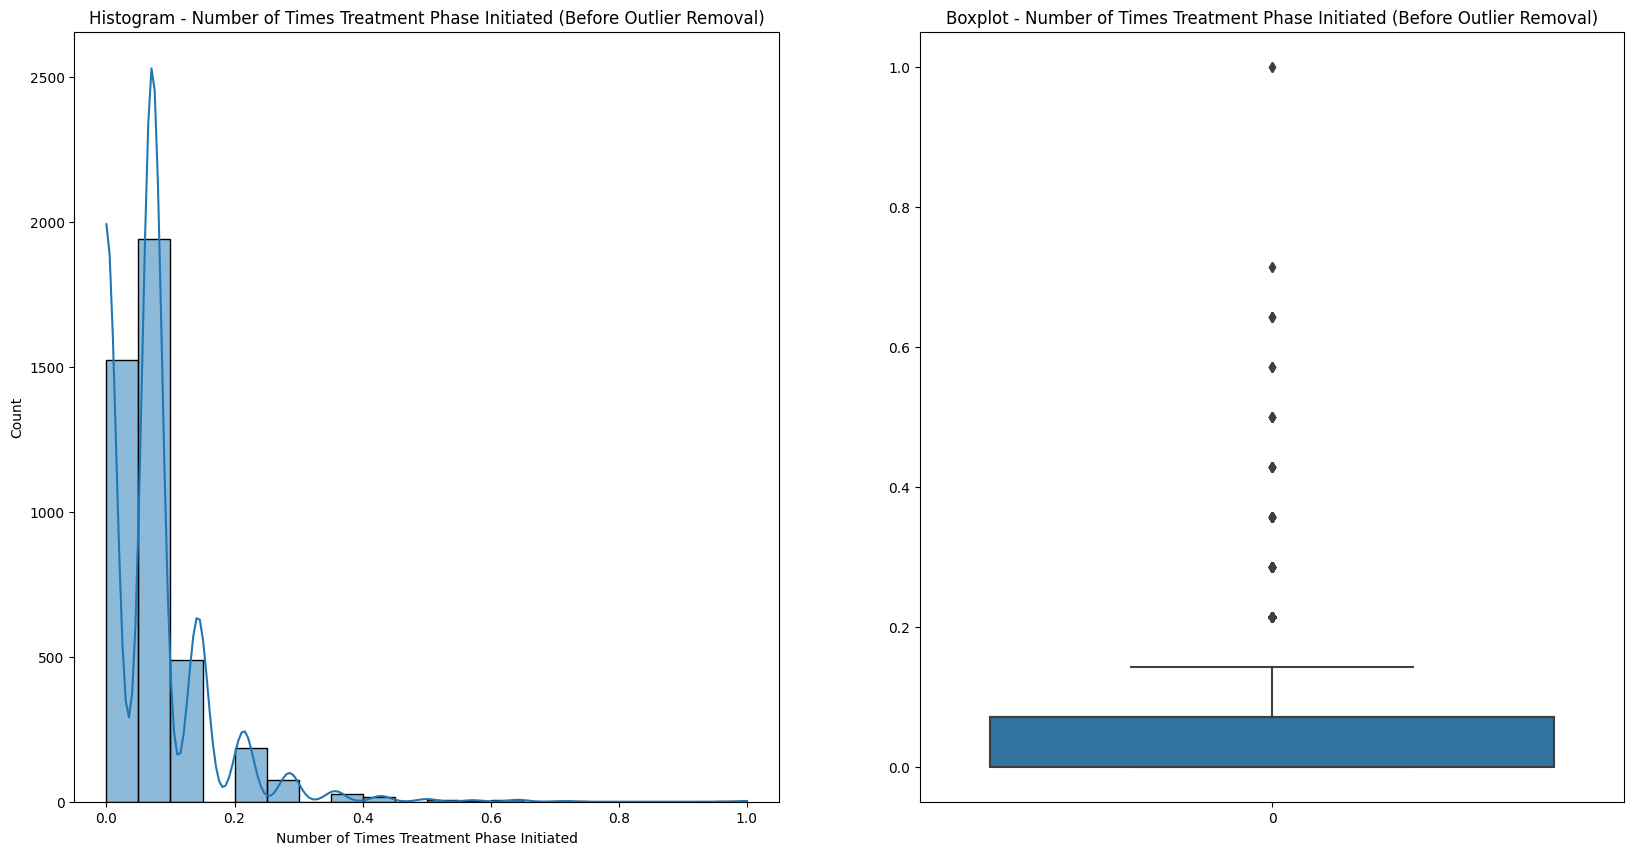

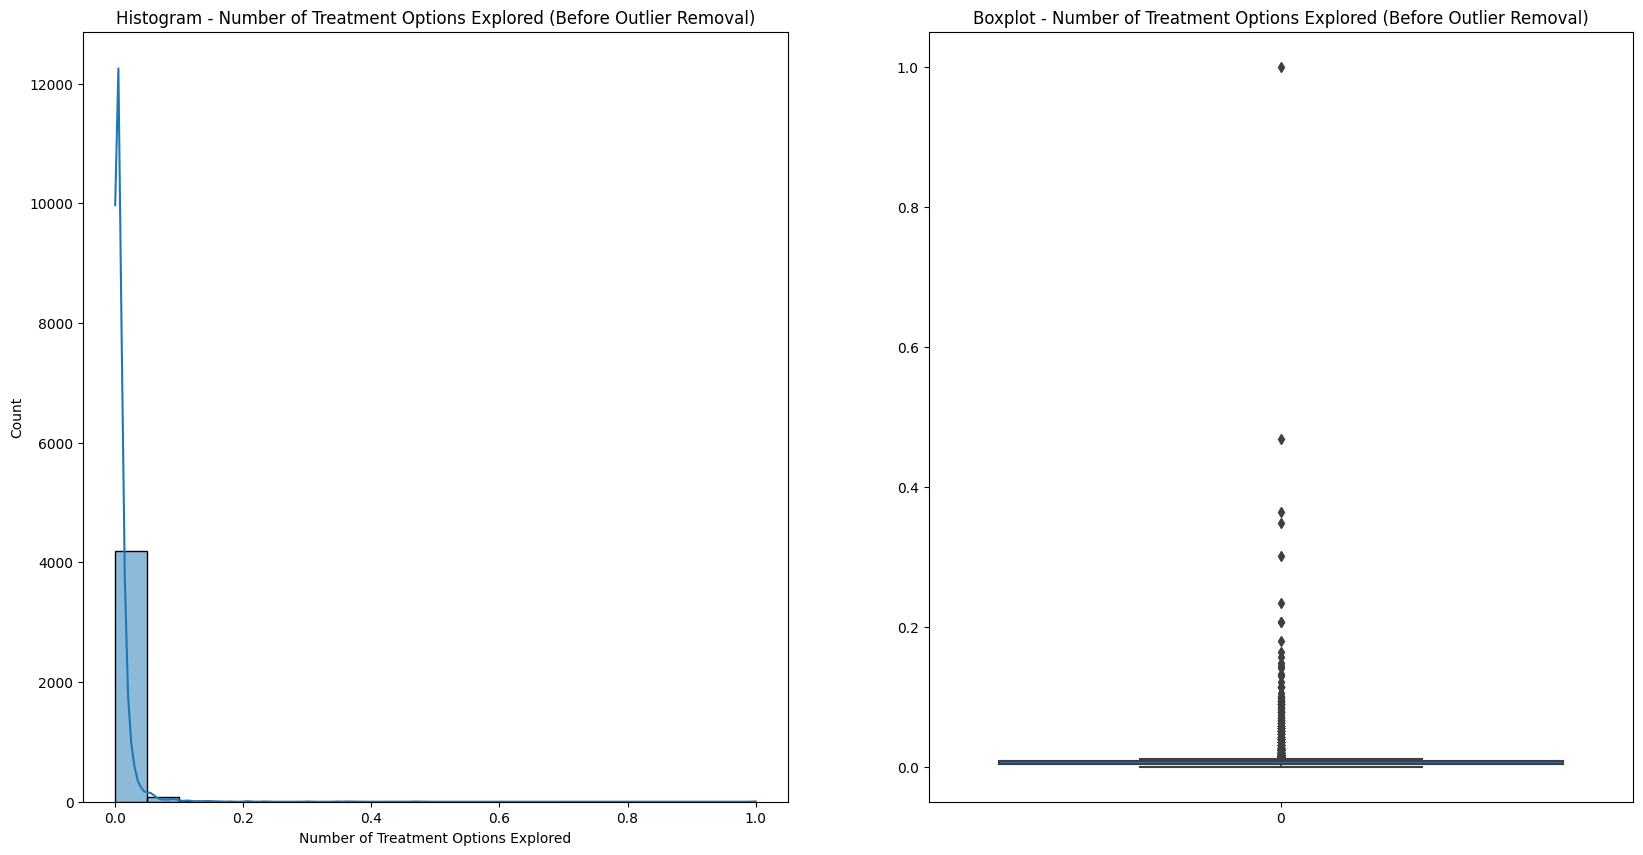

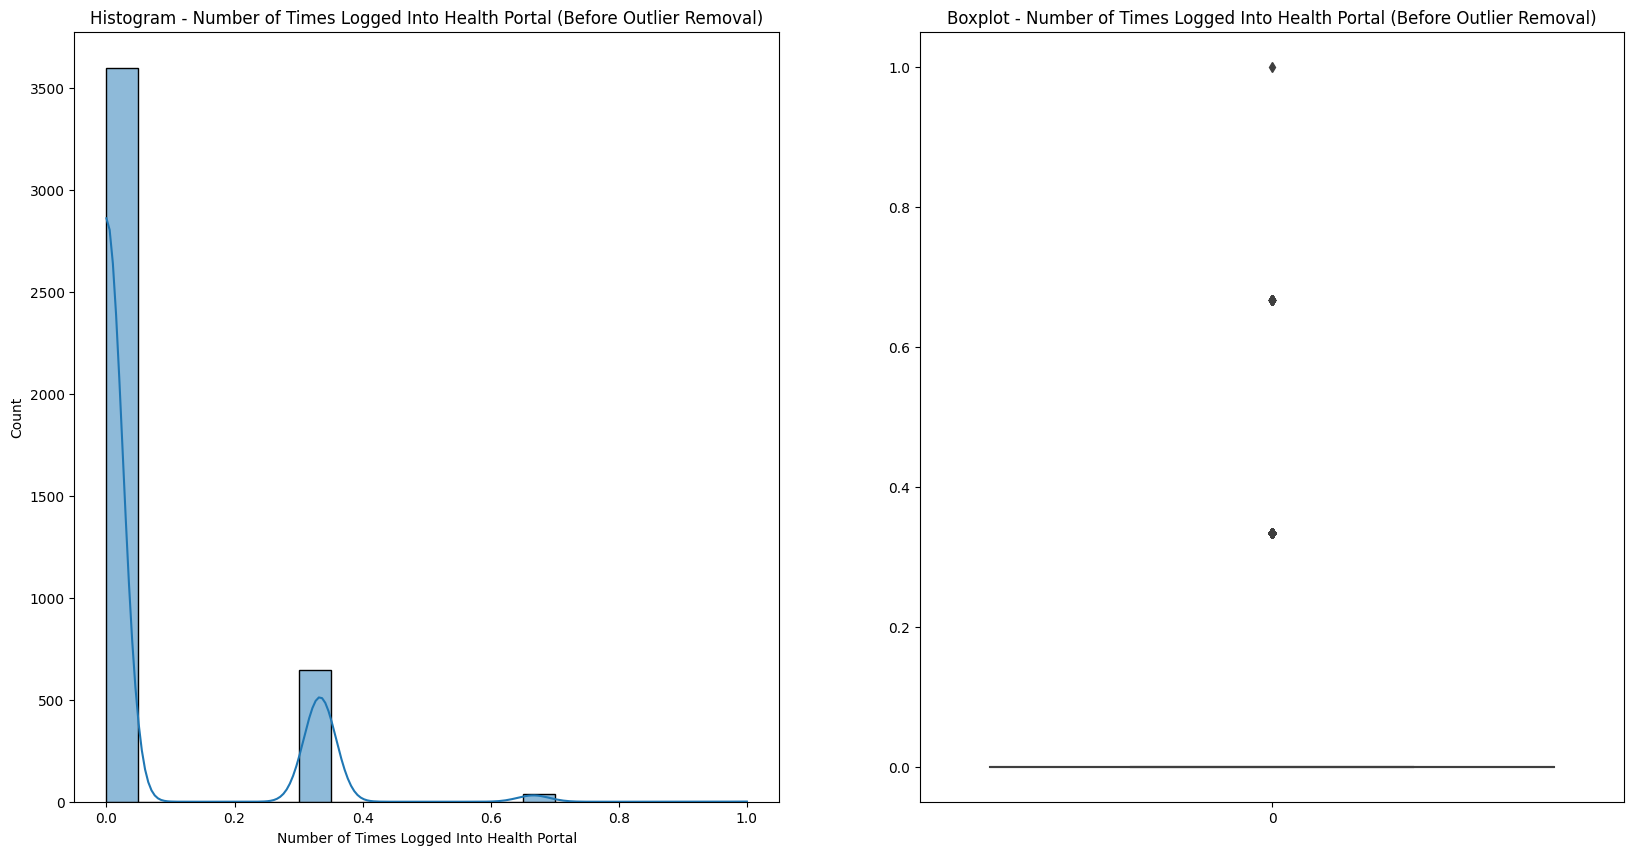

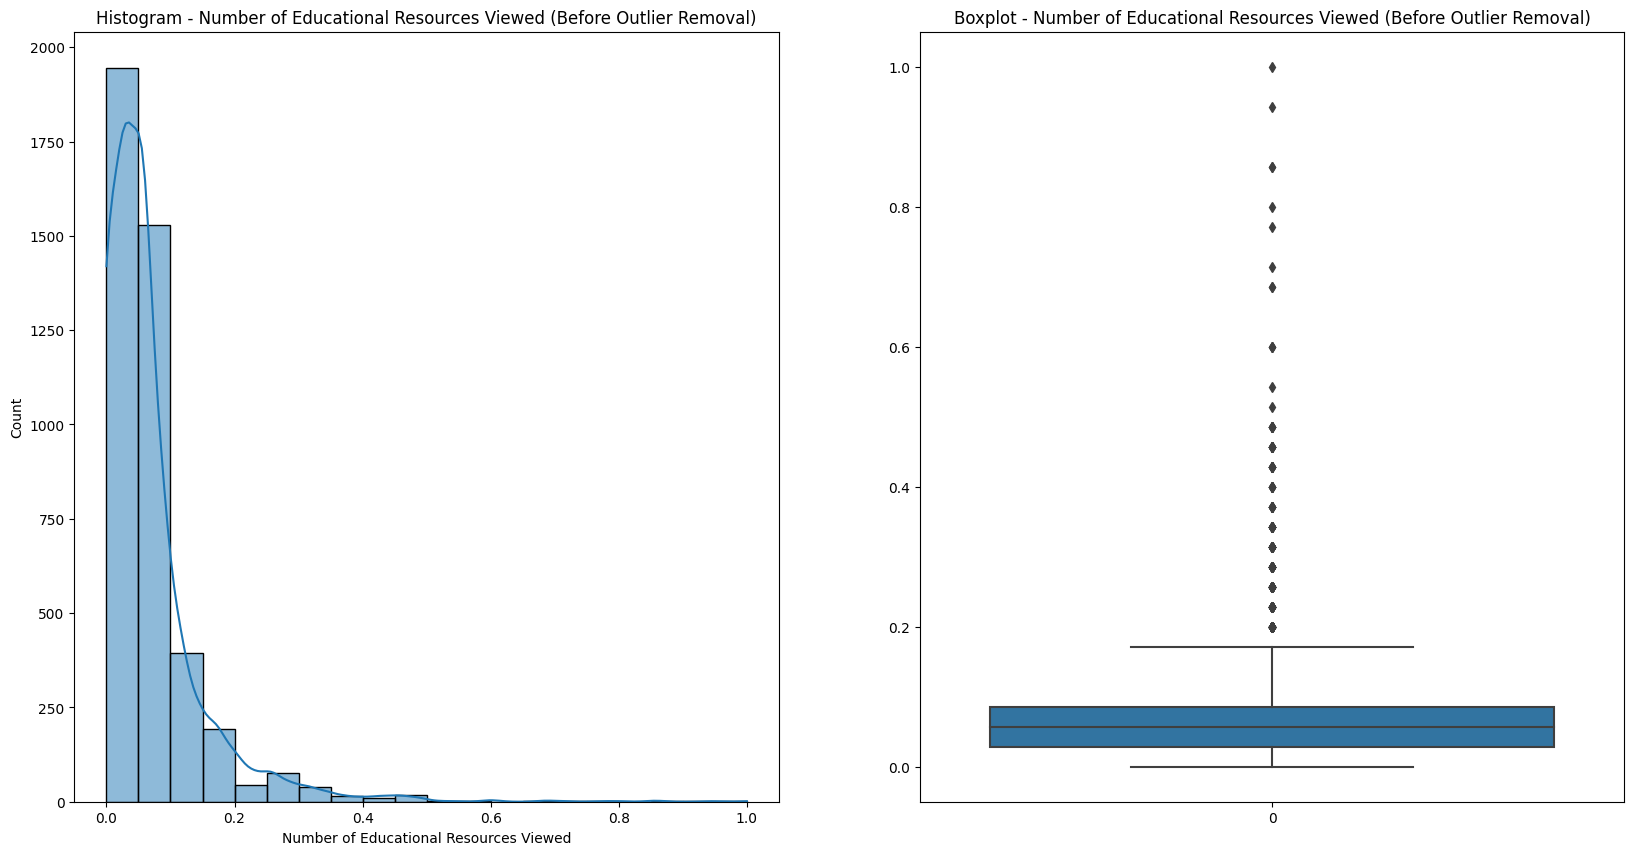

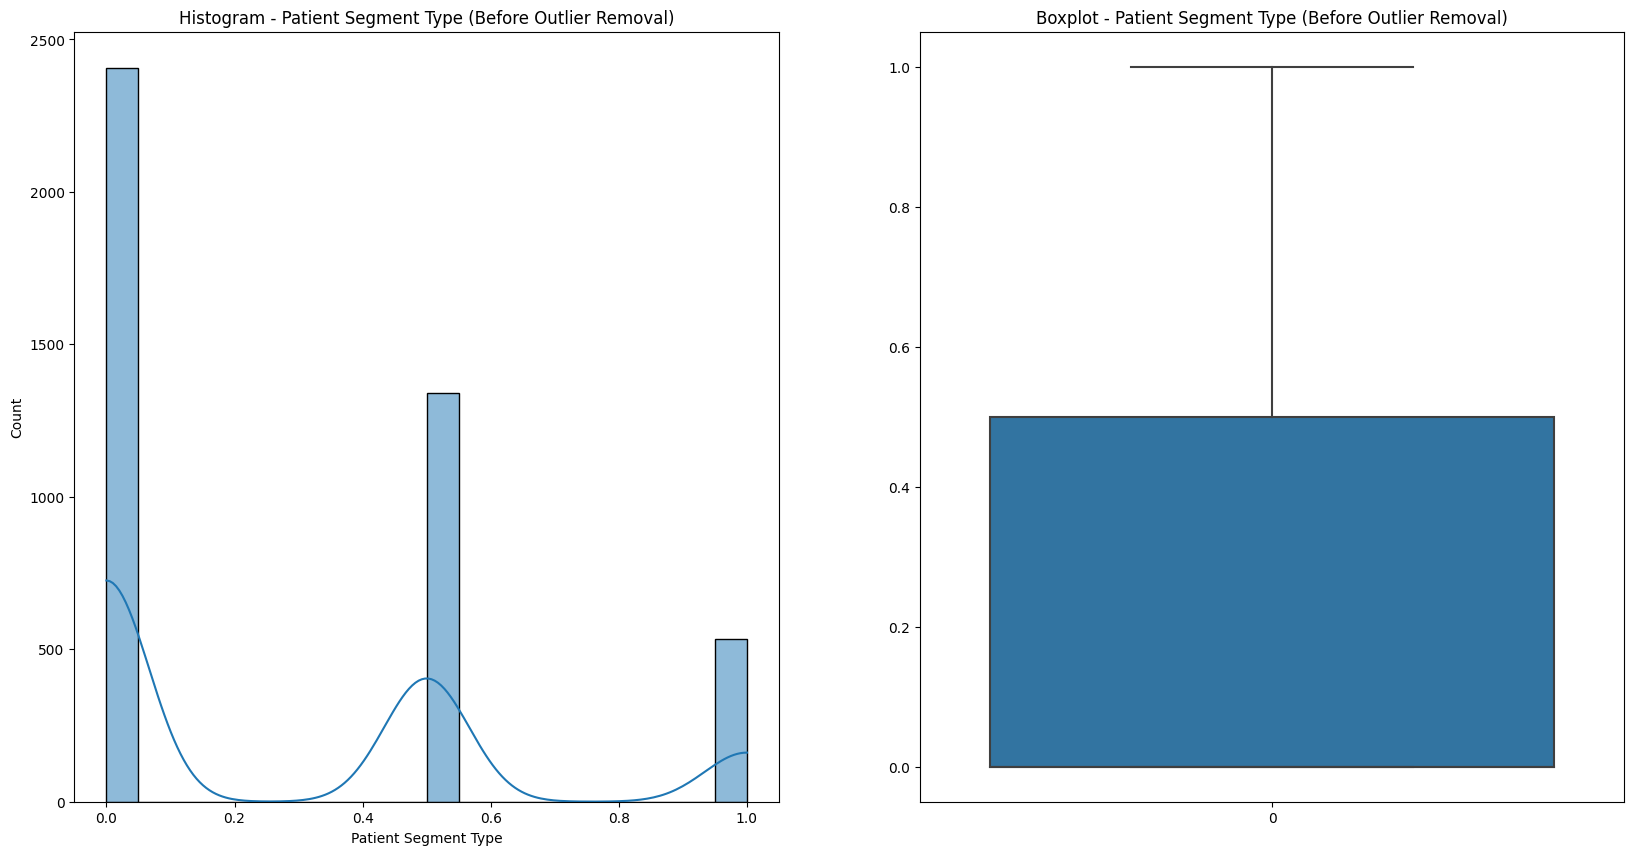

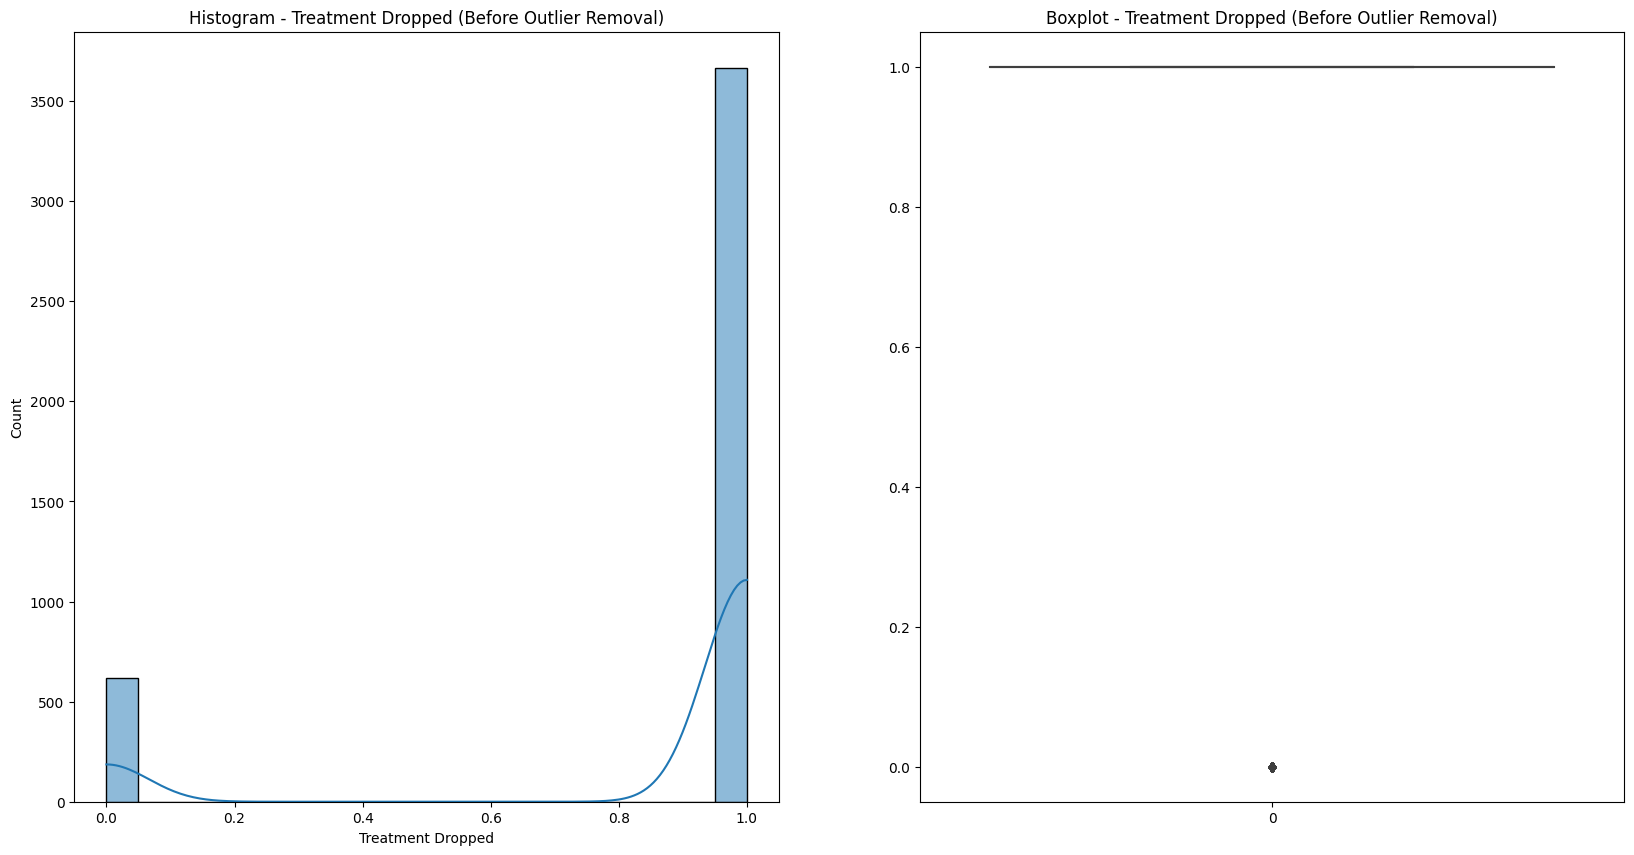

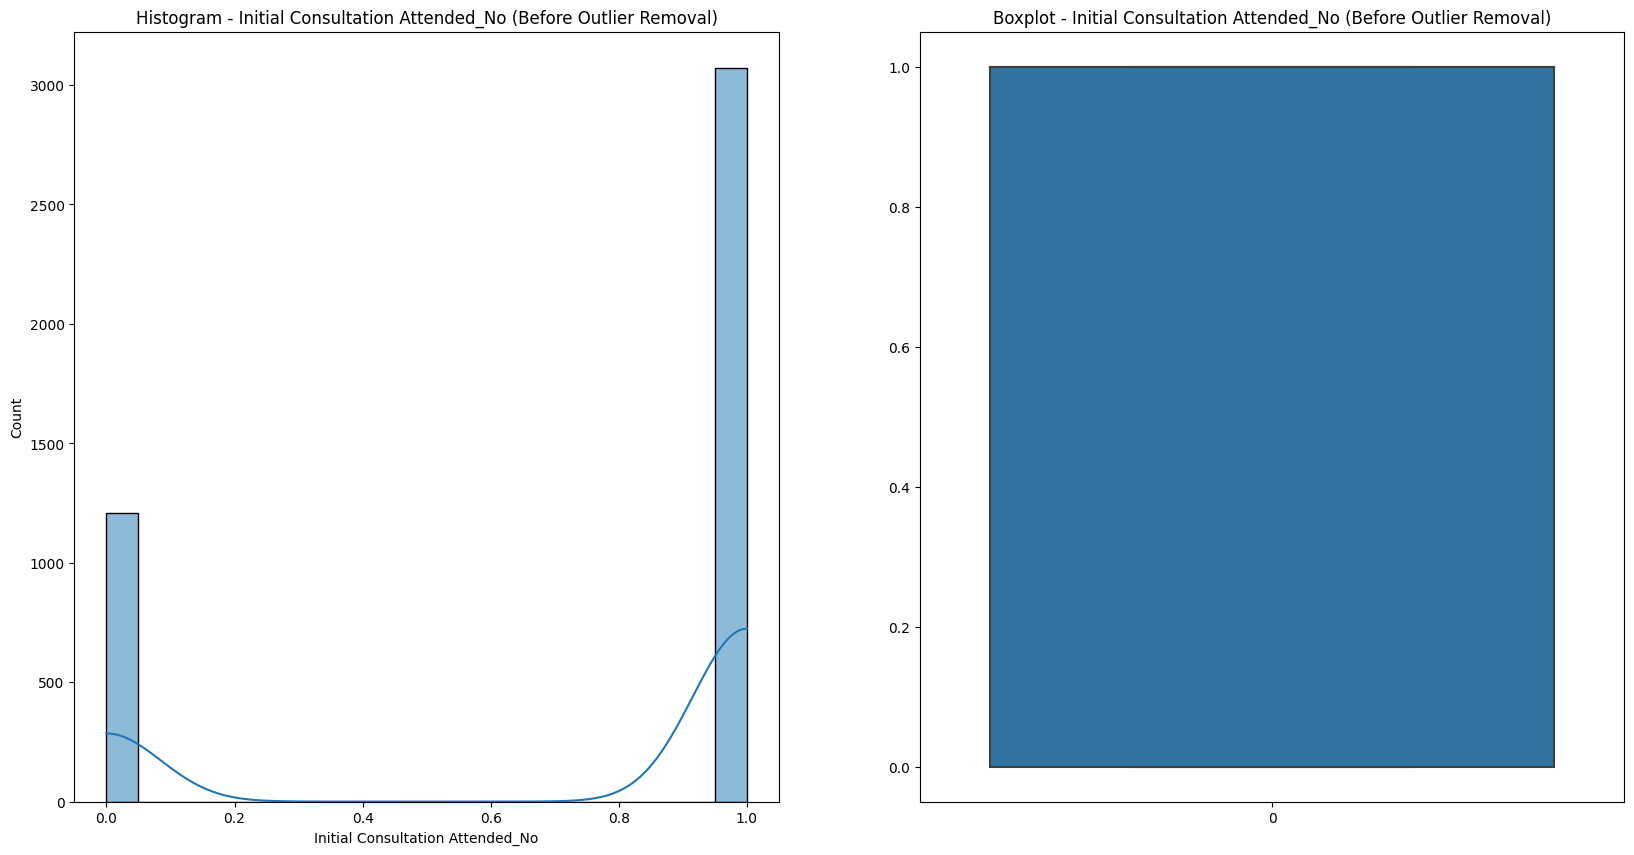

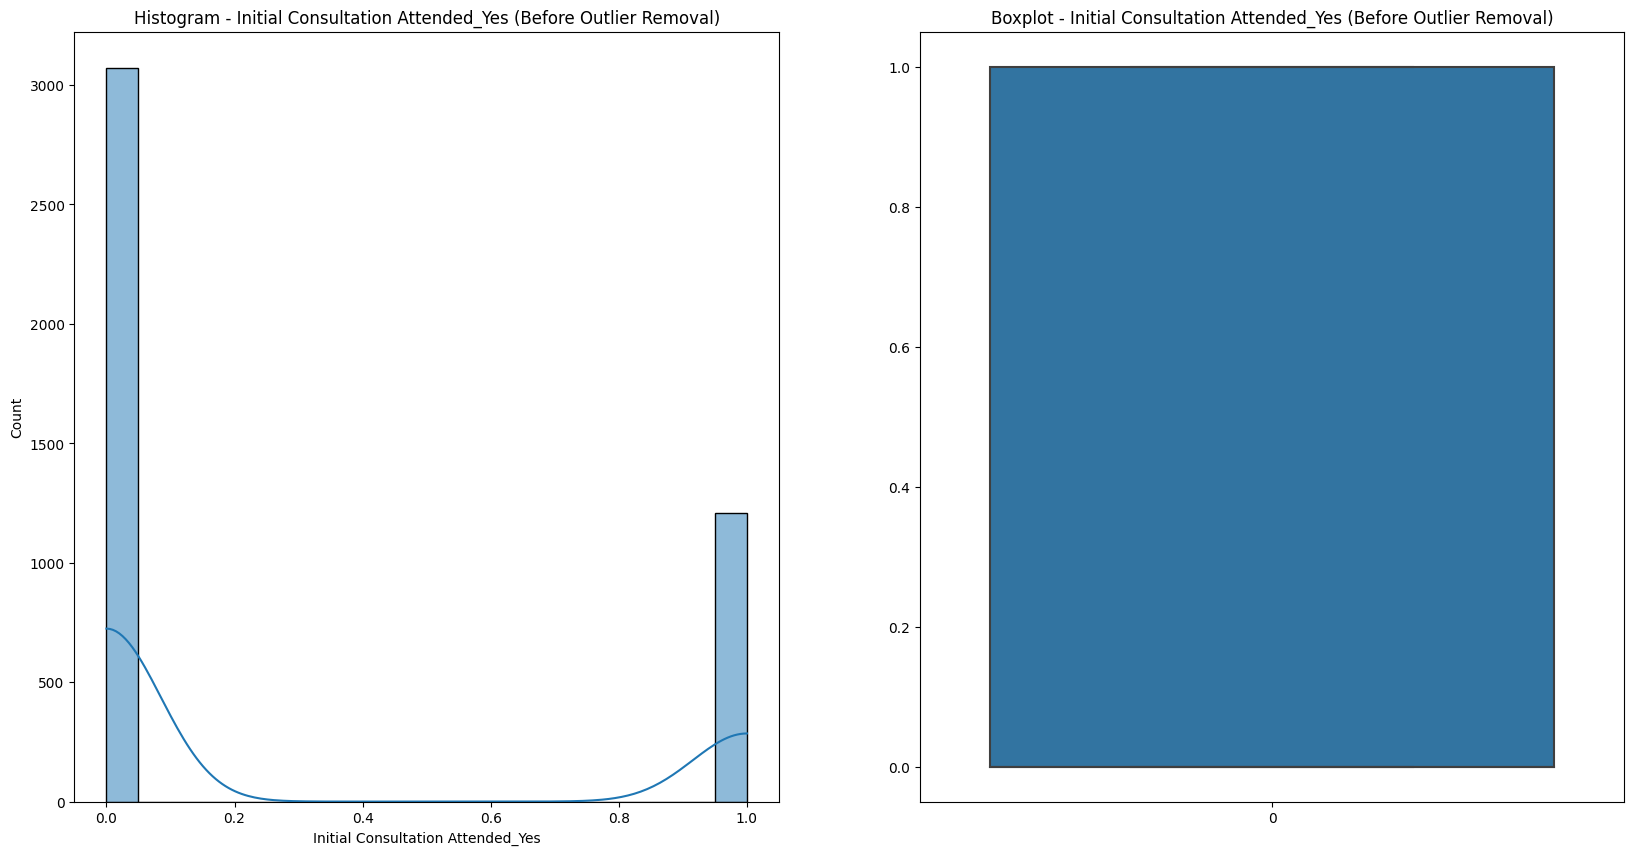

In [1527]:
# Selecting only the numerical columns
numeric_cols = data_cleaned.select_dtypes(include=[np.number]).columns

for col in numeric_cols:
    plt.figure(figsize=(20, 10))
    
    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(data_cleaned[col], bins=20, kde=True)
    plt.title(f'Histogram - {col} (Before Outlier Removal)')
    
    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(data_cleaned[col])
    plt.title(f'Boxplot - {col} (Before Outlier Removal)')
    
    plt.show()


As evident from the boxplots and histograms the data is highly **skewed** and hence we can use interquartile range to remove the outliers

### **2.6.2.** IQR Method

#### **2.6.2.1.** Identifying outliers

This code identifies outliers in the numerical columns of the cleaned DataFrame using the Interquartile Range (IQR) method, skipping the target variable 'Treatment Dropped.' It calculates the lower and upper bounds for each numeric column and collects any outliers into a new DataFrame, `outliers_df`, which is displayed at the end.


In [1528]:
# Making numeric columns
numeric_cols = data_cleaned.select_dtypes(include=[np.number]).columns

# Initializing an empty DataFrame to store the outlier data
outliers_df = pd.DataFrame()

# Looping through all numeric columns to detect outliers using the IQR method
for col in numeric_cols:
    
    if col == 'Treatment Dropped':
        continue  # Skip capping for the target variable
    
    # Calculating Q1 and Q3
    Q1 = data_cleaned[col].quantile(0.25)  # First quartile
    Q3 = data_cleaned[col].quantile(0.75)  # Third quartile
    IQR = Q3 - Q1  # Interquartile range

    # Calculating outlier bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Printing bounds for reference
    print(f"{col} \n Lower Bound: {lower_bound} \n Upper Bound: {upper_bound}\n\n")

    # Identifying outliers for the current column
    outliers = data_cleaned.loc[(data_cleaned[col] < lower_bound) | (data_cleaned[col] > upper_bound)]
    
    # Appending outliers to the outliers DataFrame
    outliers_df = pd.concat([outliers_df, outliers])

# Displaying all detected outliers
print("Detected Outliers Using IQR Method \n")
outliers_df

Number of Treatment Sessions Attended 
 Lower Bound: -0.02408256880733945 
 Upper Bound: 0.07683486238532111


Number of Treatment Goals Set 
 Lower Bound: -0.02222222222222222 
 Upper Bound: 0.048888888888888885


Number of Treatment Goals Revised 
 Lower Bound: 0.0 
 Upper Bound: 0.0


Number of Progress Reviews Attended 
 Lower Bound: -0.08823529411764705 
 Upper Bound: 0.14705882352941174


Number of Times Treatment Plan Confirmed 
 Lower Bound: 0.0 
 Upper Bound: 0.0


Number of Times Treatment Phase Initiated 
 Lower Bound: -0.10714285714285714 
 Upper Bound: 0.17857142857142855


Number of Treatment Options Explored 
 Lower Bound: -0.001953125 
 Upper Bound: 0.013671875


Number of Times Logged Into Health Portal 
 Lower Bound: 0.0 
 Upper Bound: 0.0


Number of Educational Resources Viewed 
 Lower Bound: -0.05714285714285715 
 Upper Bound: 0.17142857142857143


Patient Segment Type 
 Lower Bound: -0.75 
 Upper Bound: 1.25


Initial Consultation Attended_No 
 Lower Bound: -1.5 


,Number of Treatment Sessions Attended,Number of Treatment Goals Set,Number of Treatment Goals Revised,Number of Progress Reviews Attended,Number of Times Treatment Plan Confirmed,Number of Times Treatment Phase Initiated,Number of Treatment Options Explored,Number of Times Logged Into Health Portal,Number of Educational Resources Viewed,Patient Segment Type,Treatment Dropped,Initial Consultation Attended_No,Initial Consultation Attended_Yes
1,0.087156,0.000000,0.00,0.058824,0.000000,0.000000,0.007812,0.000000,0.057143,0.0,1.0,1,0
18,0.080275,0.008889,0.16,0.176471,0.000000,0.142857,0.003906,0.333333,0.257143,1.0,1.0,1,0
21,0.080275,0.062222,0.00,0.088235,0.090909,0.214286,0.011719,0.000000,0.257143,0.5,1.0,1,0
46,0.087156,0.057778,0.00,0.147059,0.090909,0.000000,0.050781,0.000000,0.028571,0.5,0.0,1,0
68,0.077982,0.115556,0.10,0.000000,0.000000,0.000000,0.003906,0.000000,0.028571,1.0,1.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4248,0.270642,0.133333,0.86,0.500000,0.000000,0.071429,0.031250,0.000000,0.257143,1.0,1.0,0,1
4265,0.036697,0.004444,0.02,0.000000,0.000000,0.000000,0.015625,0.000000,0.257143,0.0,1.0,0,1
4267,0.181193,0.097778,0.26,0.411765,0.090909,0.071429,0.015625,0.000000,0.457143,1.0,0.0,1,0
4270,0.133028,0.000000,0.00,0.235294,0.090909,0.142857,0.011719,0.000000,0.285714,0.0,0.0,1,0


#### **2.6.2.2.** Removing outliers

This code caps outliers in the specified columns of the cleaned DataFrame using the Interquartile Range (IQR) method, ensuring that values below the lower bound or above the upper bound are replaced with those limits. The updated dataset is then displayed, showing the effect of outlier capping.

In [1529]:
# Specify the columns from which to remove outliers
columns_to_clean = [
    'Number of Treatment Sessions Attended',
    'Number of Treatment Goals Set',
    'Number of Progress Reviews Attended',
    'Number of Times Treatment Phase Initiated',
    'Number of Treatment Options Explored',
    'Number of Educational Resources Viewed'
]

# Looping through the specified columns to detect and cap outliers using IQR method
for col in columns_to_clean:
    # Calculate Q1 and Q3
    Q1 = data_cleaned[col].quantile(0.25)  # First quartile
    Q3 = data_cleaned[col].quantile(0.75)  # Third quartile
    IQR = Q3 - Q1  # Interquartile range

    # Calculating lower and upper bounds for capping
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Capping the outlier values in the original DataFrame
    data_cleaned[col] = data_cleaned[col].clip(lower=lower_bound, upper=upper_bound)

# Displaying the cleaned dataset after capping outliers
print("Data after capping outliers using IQR method:\n")
data_cleaned

Data after capping outliers using IQR method:



,Number of Treatment Sessions Attended,Number of Treatment Goals Set,Number of Treatment Goals Revised,Number of Progress Reviews Attended,Number of Times Treatment Plan Confirmed,Number of Times Treatment Phase Initiated,Number of Treatment Options Explored,Number of Times Logged Into Health Portal,Number of Educational Resources Viewed,Patient Segment Type,Treatment Dropped,Initial Consultation Attended_No,Initial Consultation Attended_Yes
0,0.009174,0.004444,0.00,0.000000,0.000000,0.000000,0.003906,0.0,0.000000,0.0,1.0,0,1
1,0.076835,0.000000,0.00,0.058824,0.000000,0.000000,0.007812,0.0,0.057143,0.0,1.0,1,0
2,0.018349,0.022222,0.00,0.000000,0.090909,0.071429,0.003906,0.0,0.000000,0.5,0.0,1,0
3,0.013761,0.000000,0.00,0.058824,0.000000,0.000000,0.013672,0.0,0.000000,0.0,1.0,1,0
4,0.071101,0.048889,0.24,0.029412,0.000000,0.000000,0.013672,0.0,0.000000,1.0,1.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4279,0.052752,0.022222,0.12,0.058824,0.000000,0.000000,0.011719,0.0,0.171429,1.0,1.0,0,1
4280,0.016055,0.008889,0.00,0.088235,0.000000,0.000000,0.003906,0.0,0.000000,0.0,1.0,1,0
4281,0.009174,0.004444,0.00,0.029412,0.000000,0.071429,0.003906,0.0,0.000000,0.0,1.0,1,0
4282,0.018349,0.013333,0.00,0.029412,0.000000,0.071429,0.003906,0.0,0.057143,0.5,1.0,1,0


#### **2.6.2.3.** Boxplot after applying IQR

The following code generates histograms and boxplots for each numeric column in the cleaned DataFrame after capping outliers, allowing for a visual assessment of the data distribution and the effectiveness of the outlier removal process. Each plot is labeled with the respective column name and displayed individually for clarity.

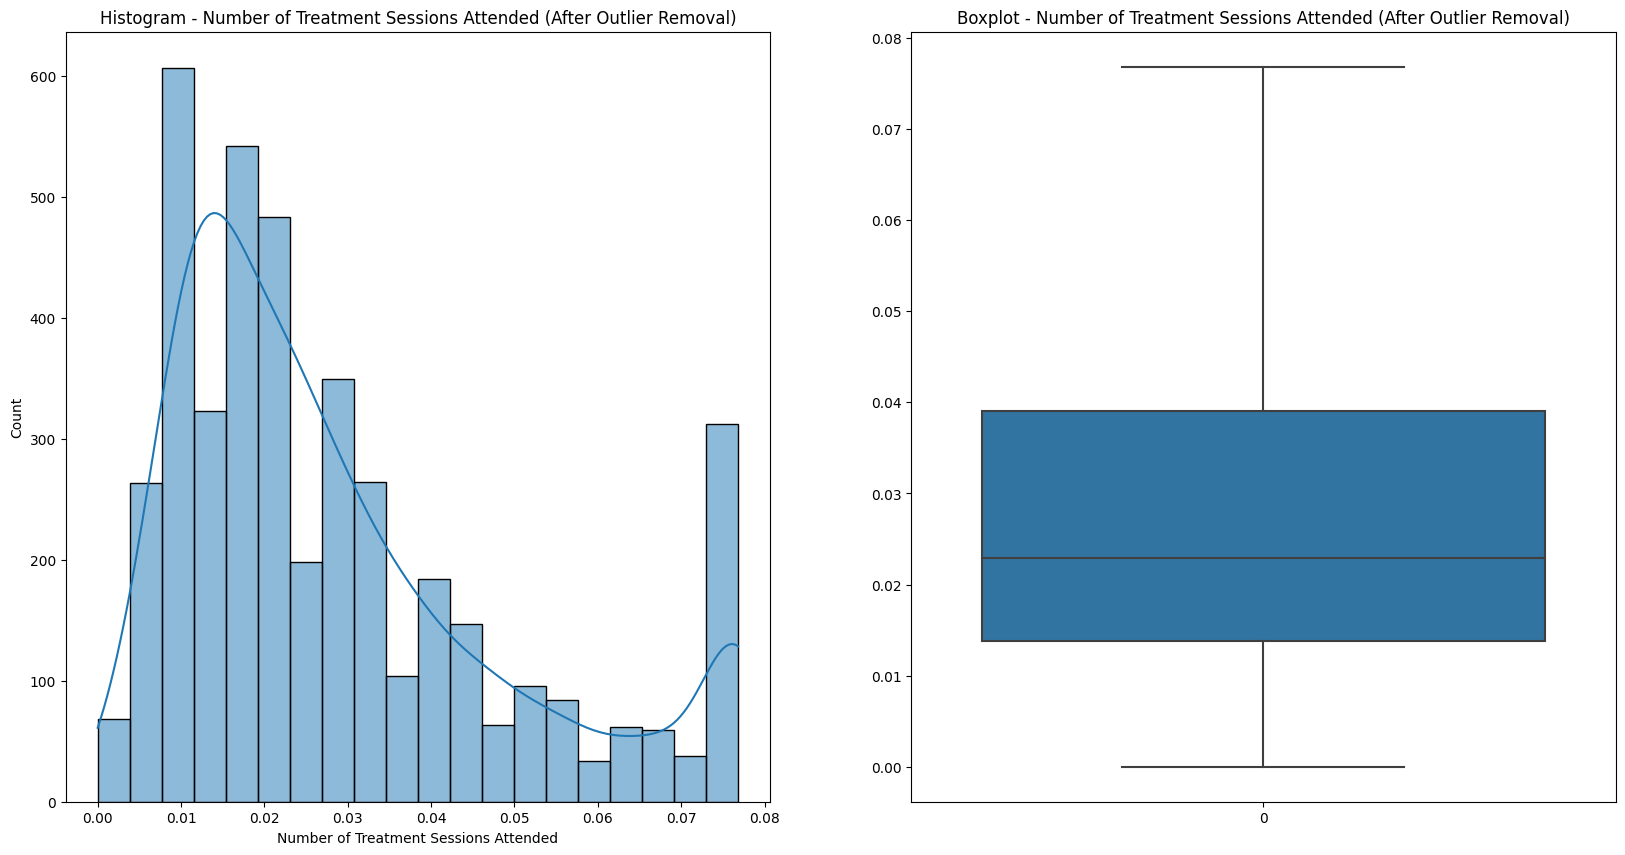

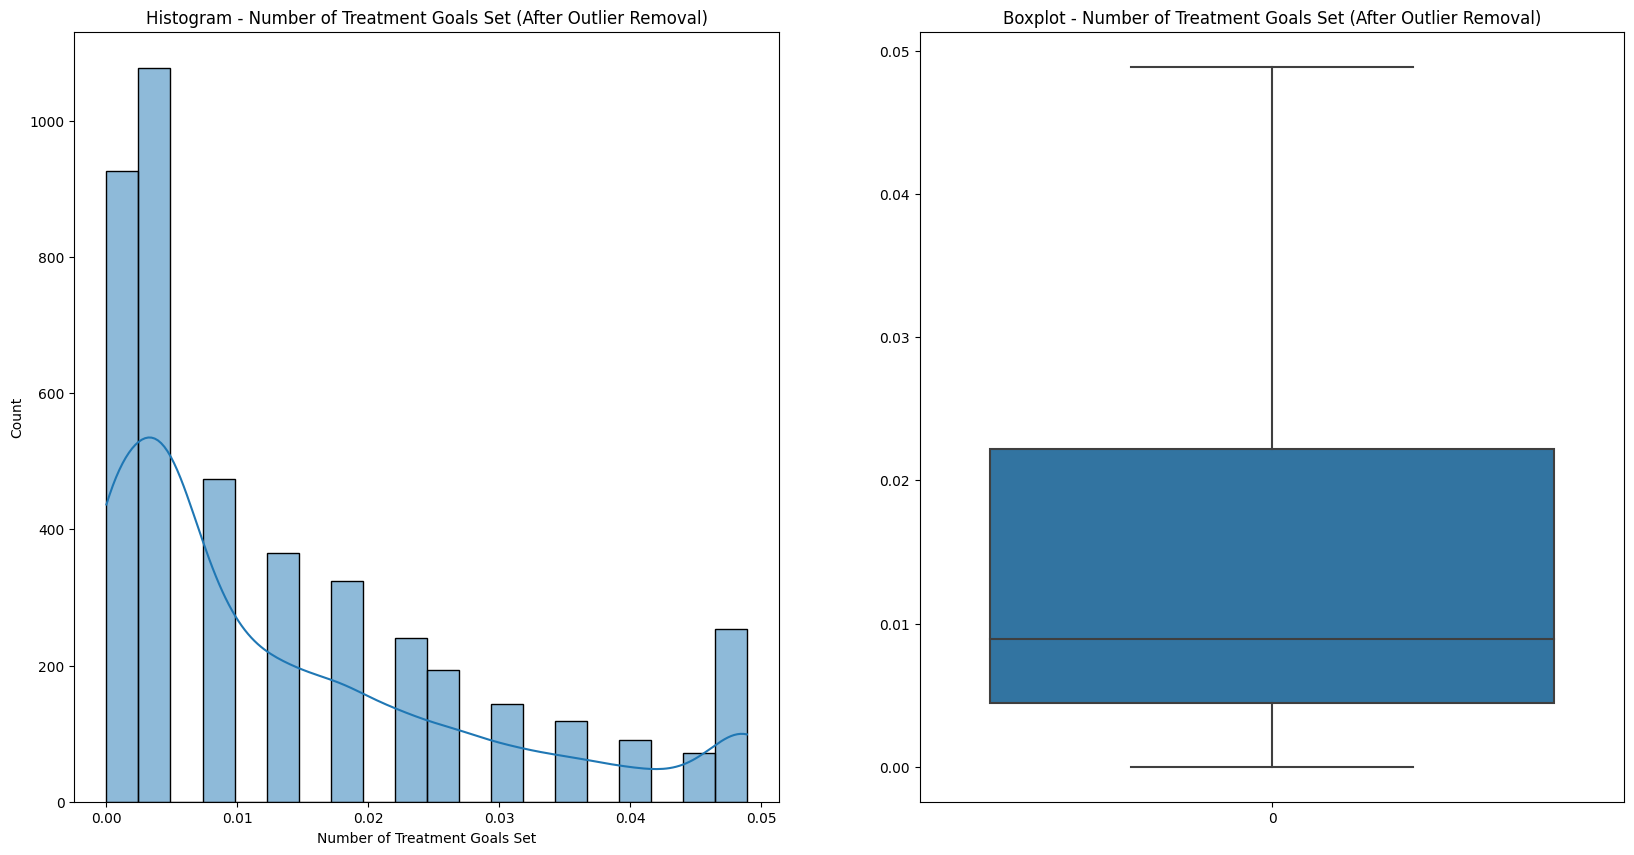

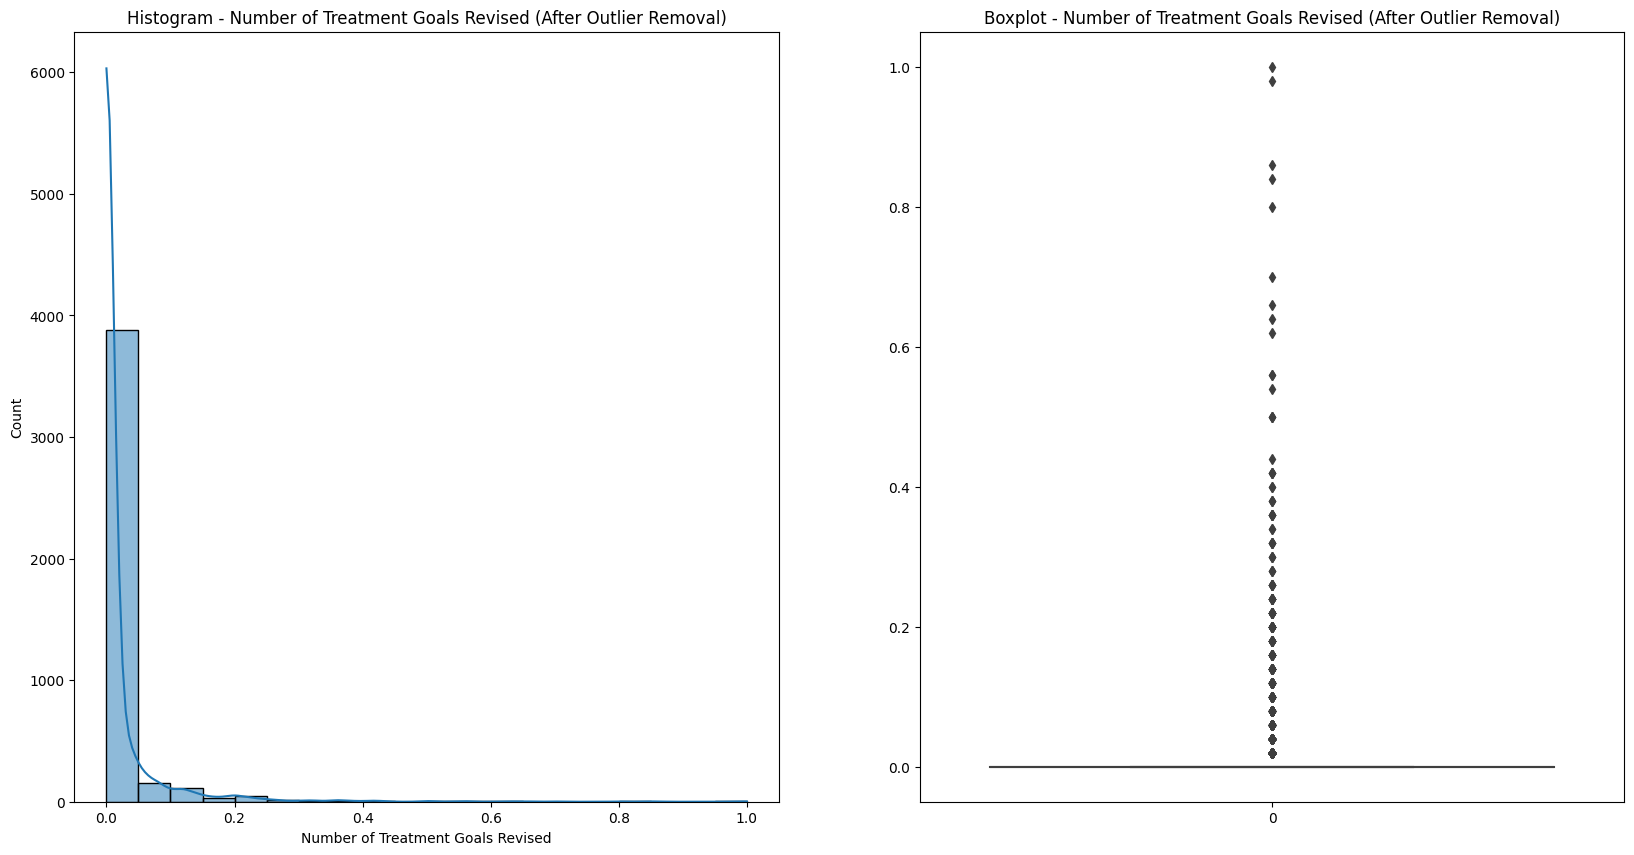

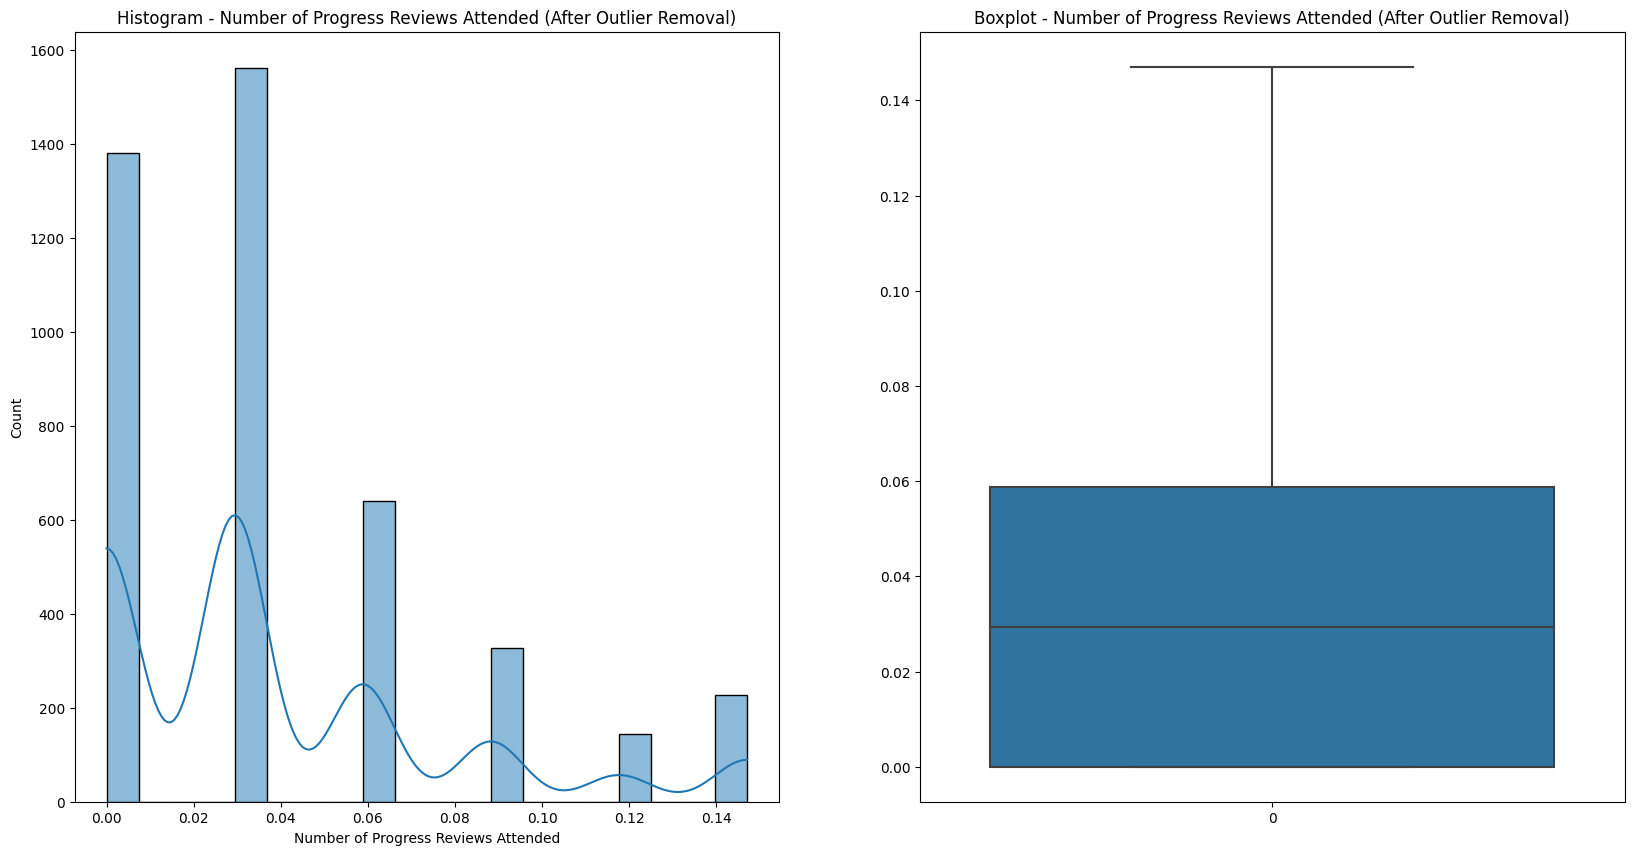

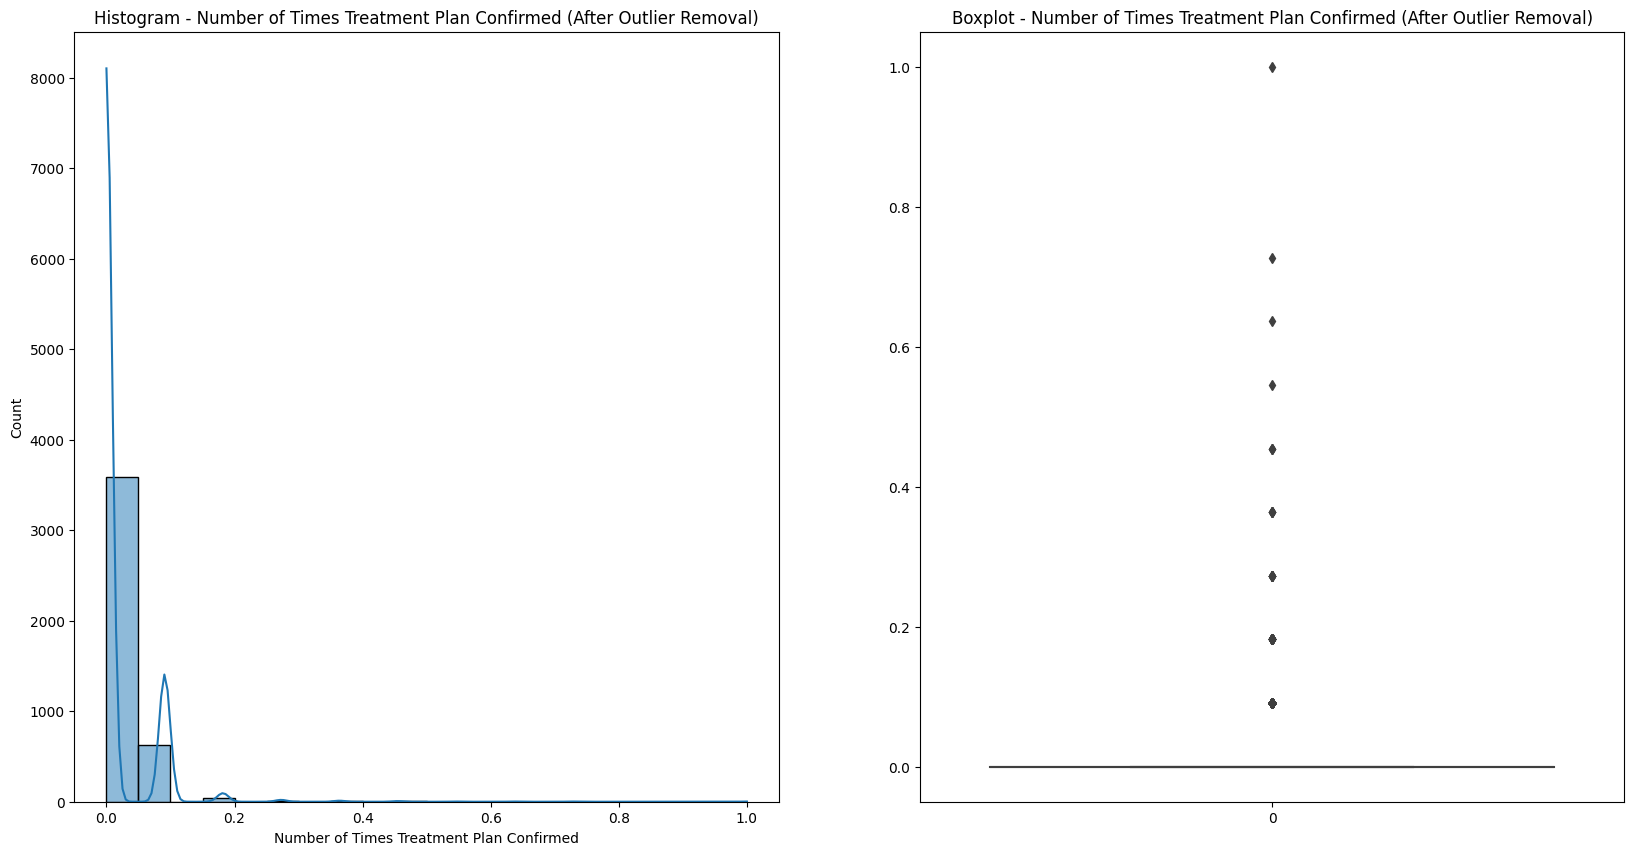

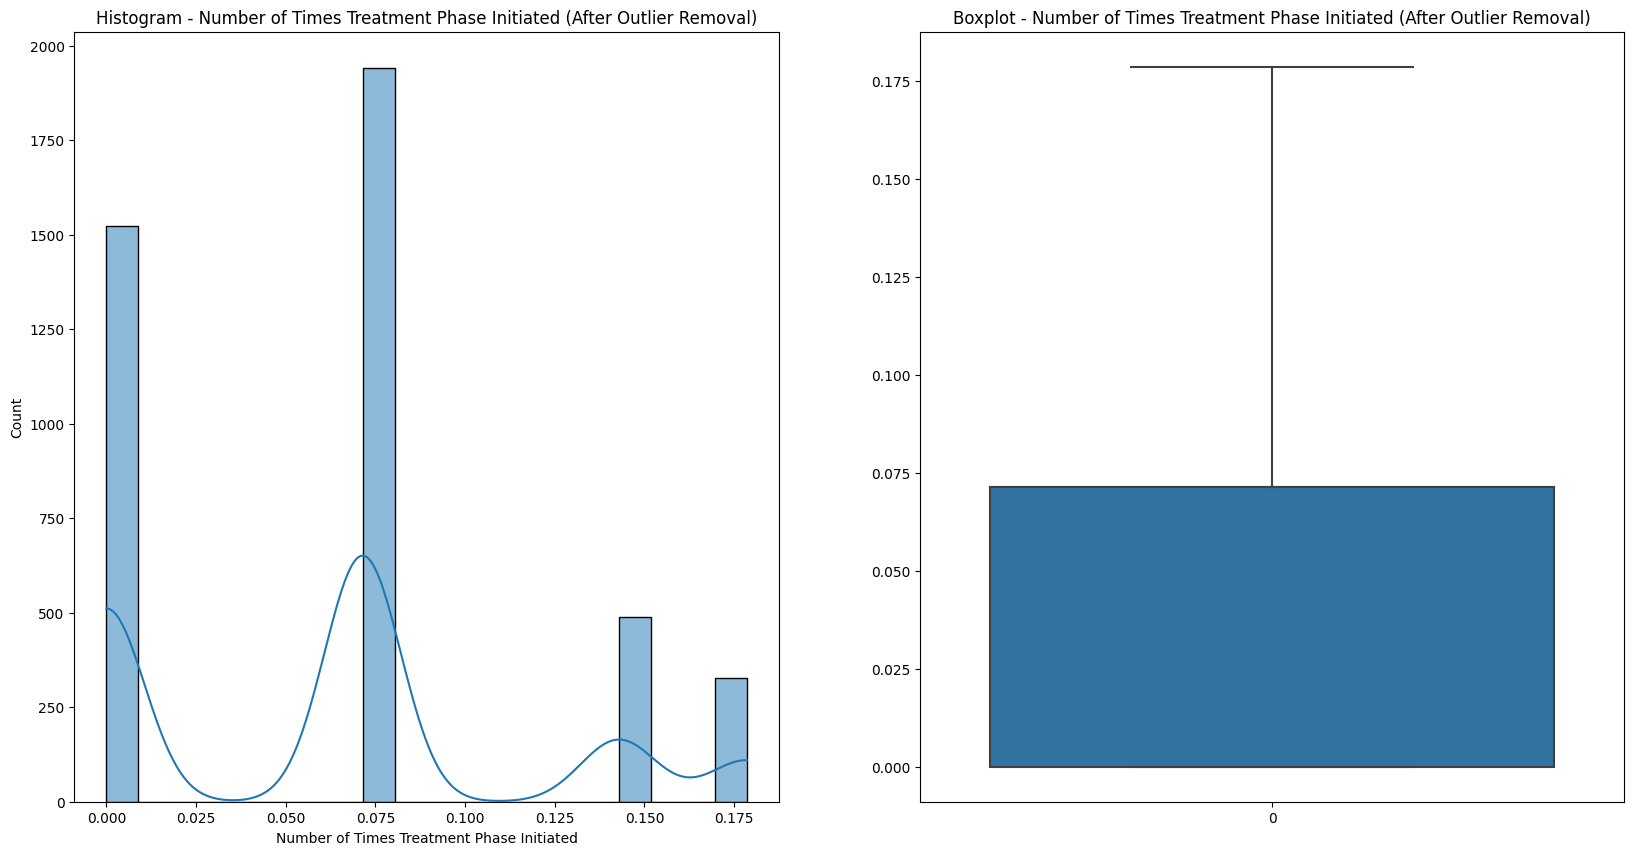

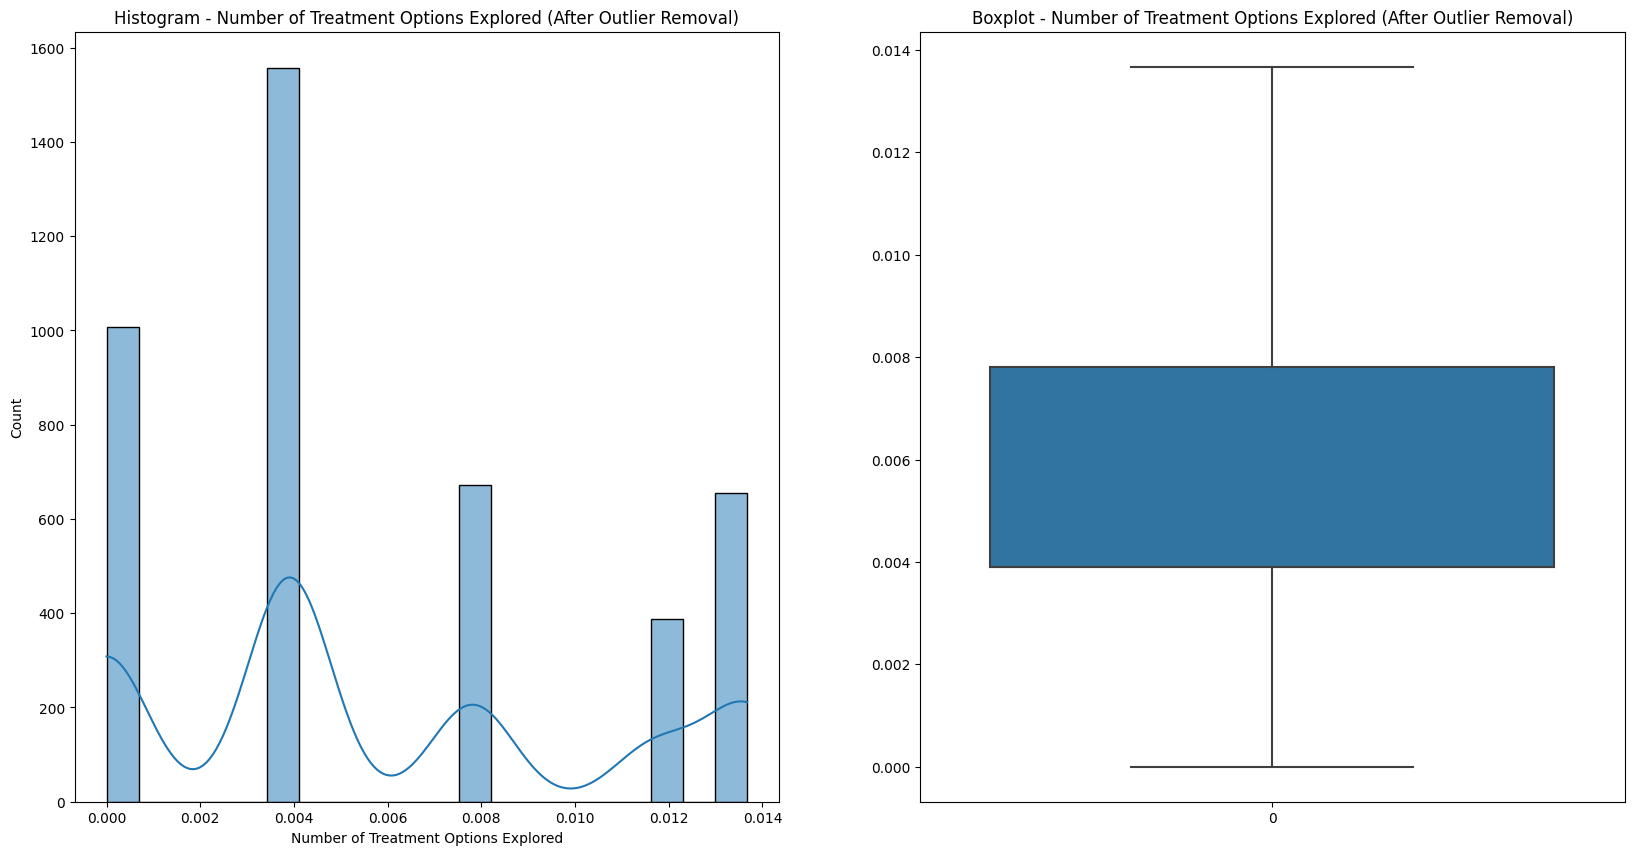

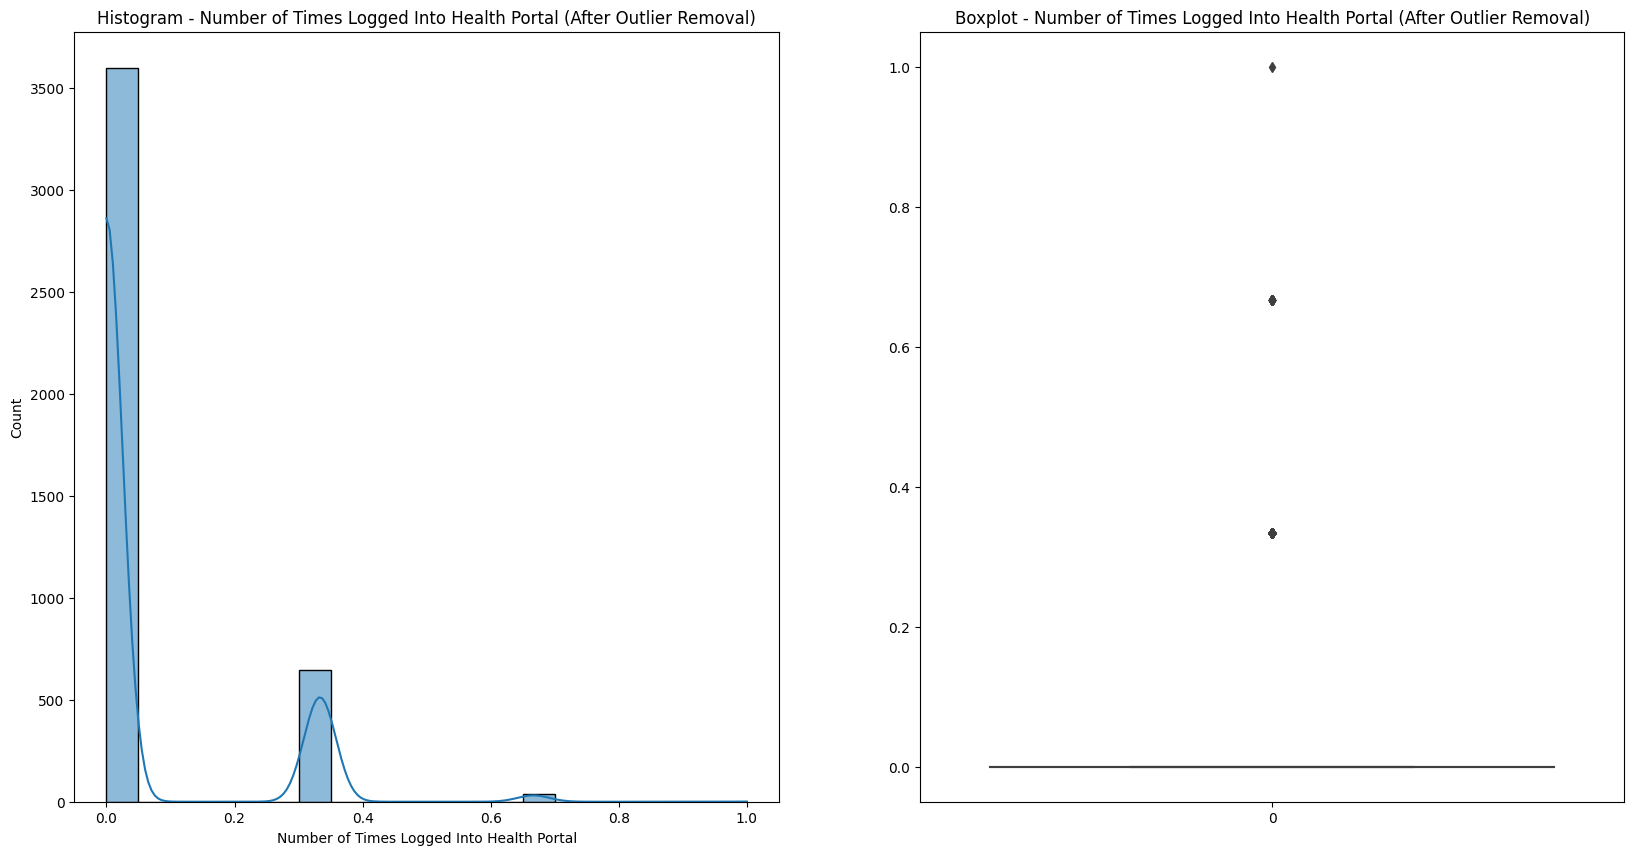

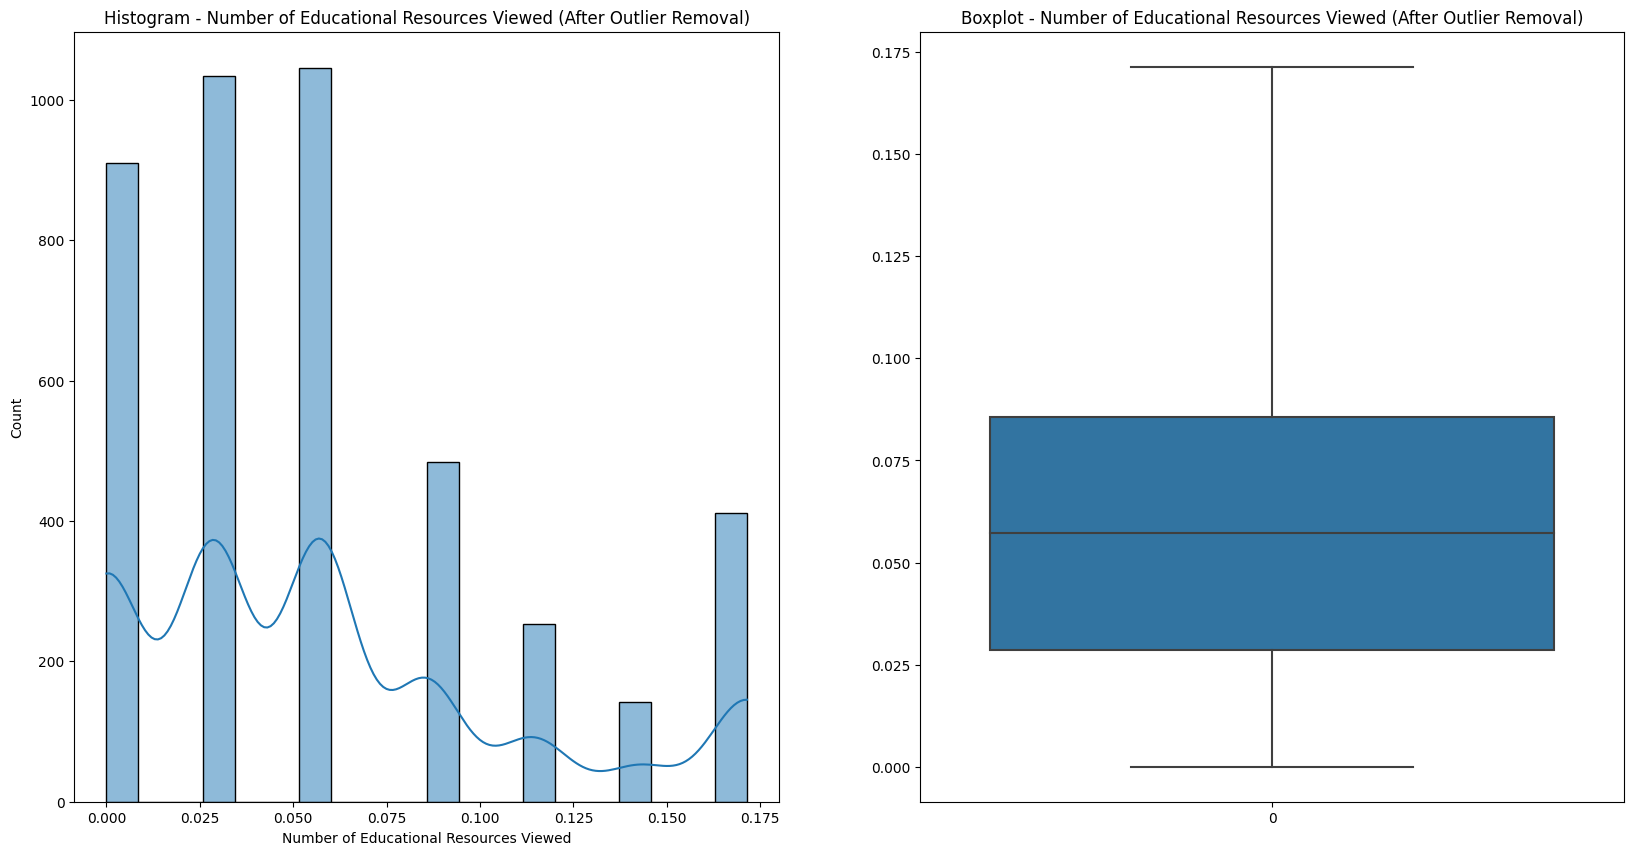

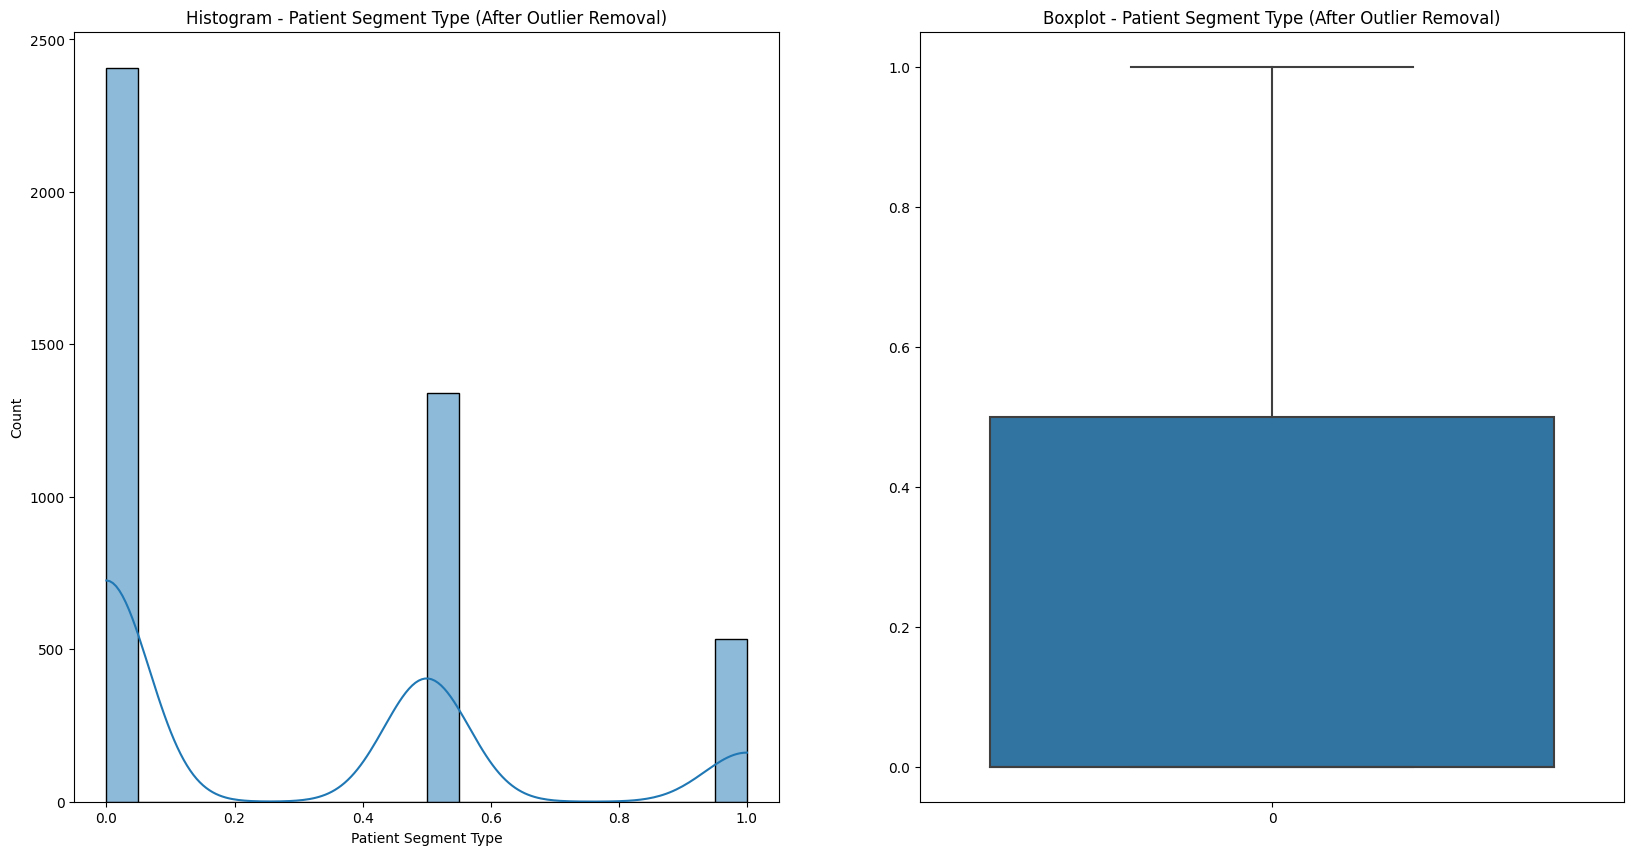

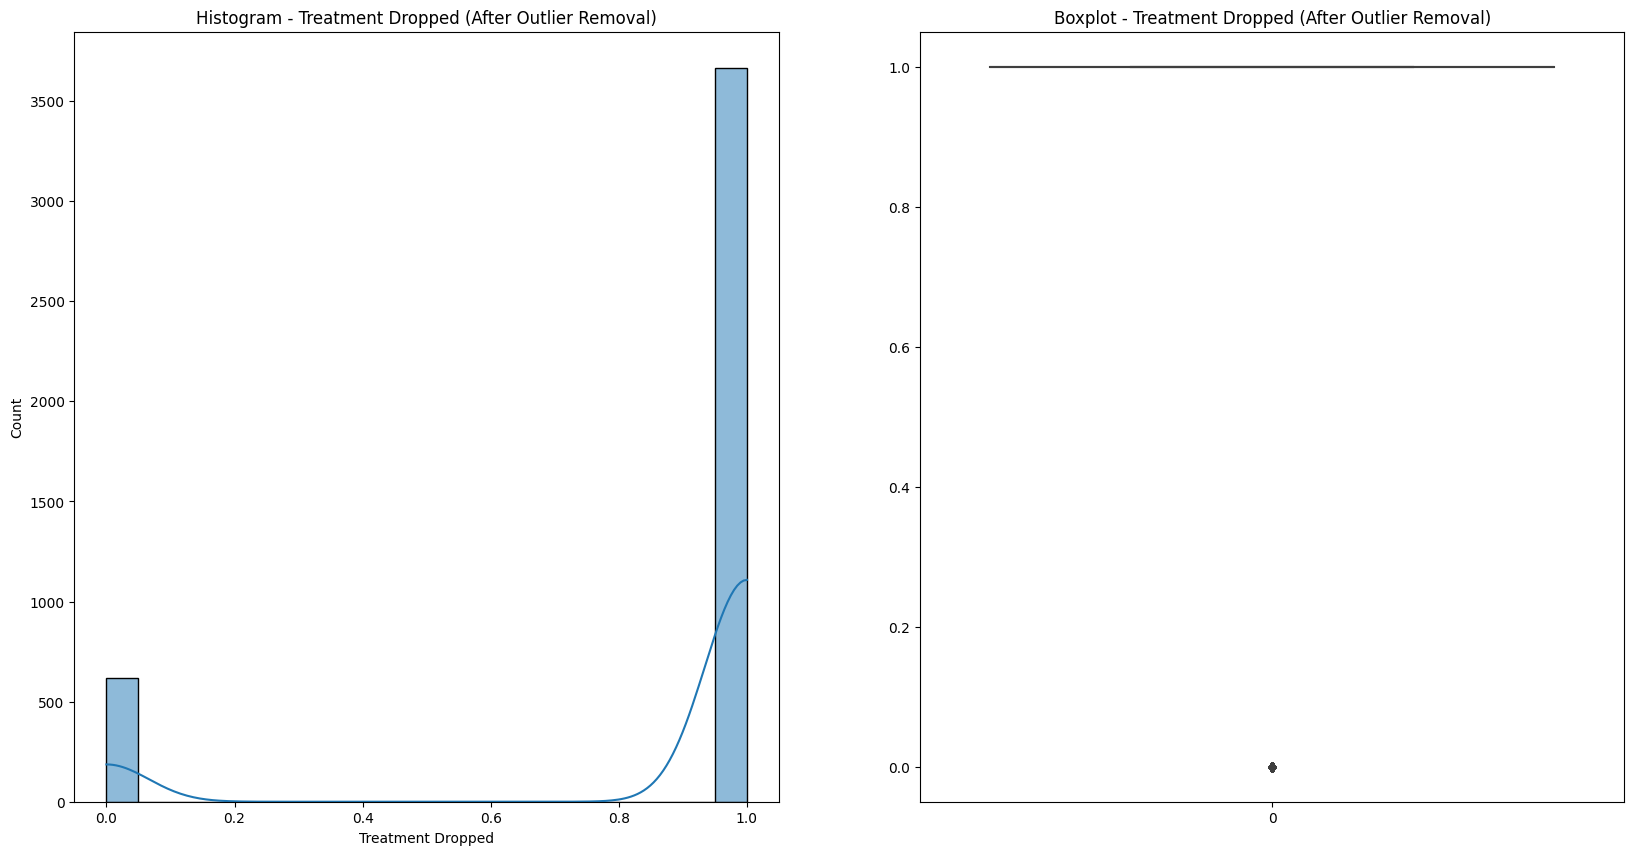

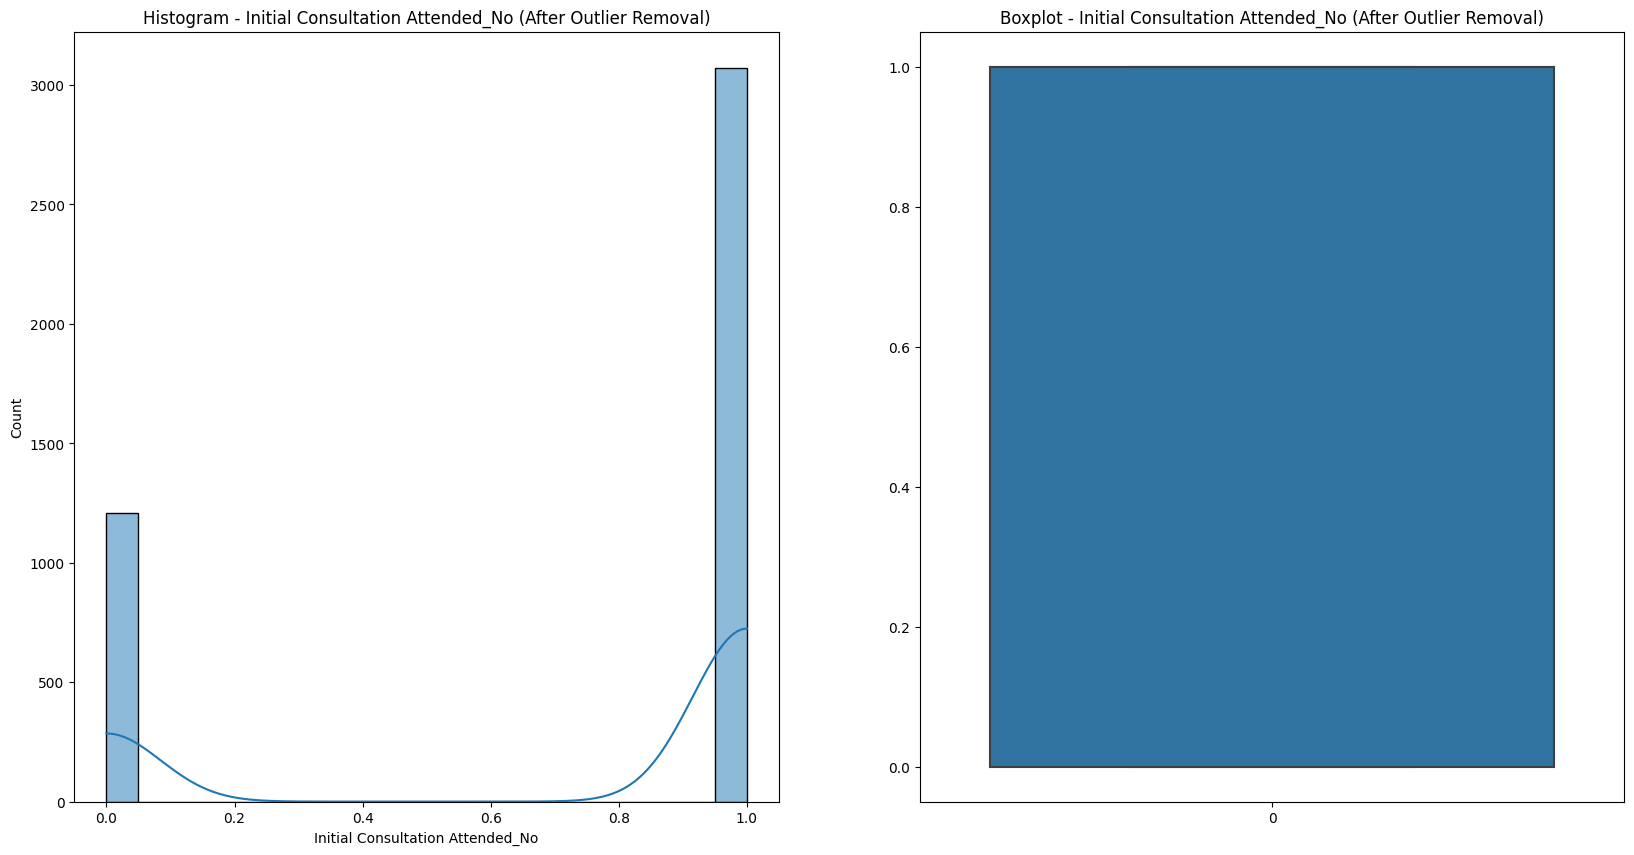

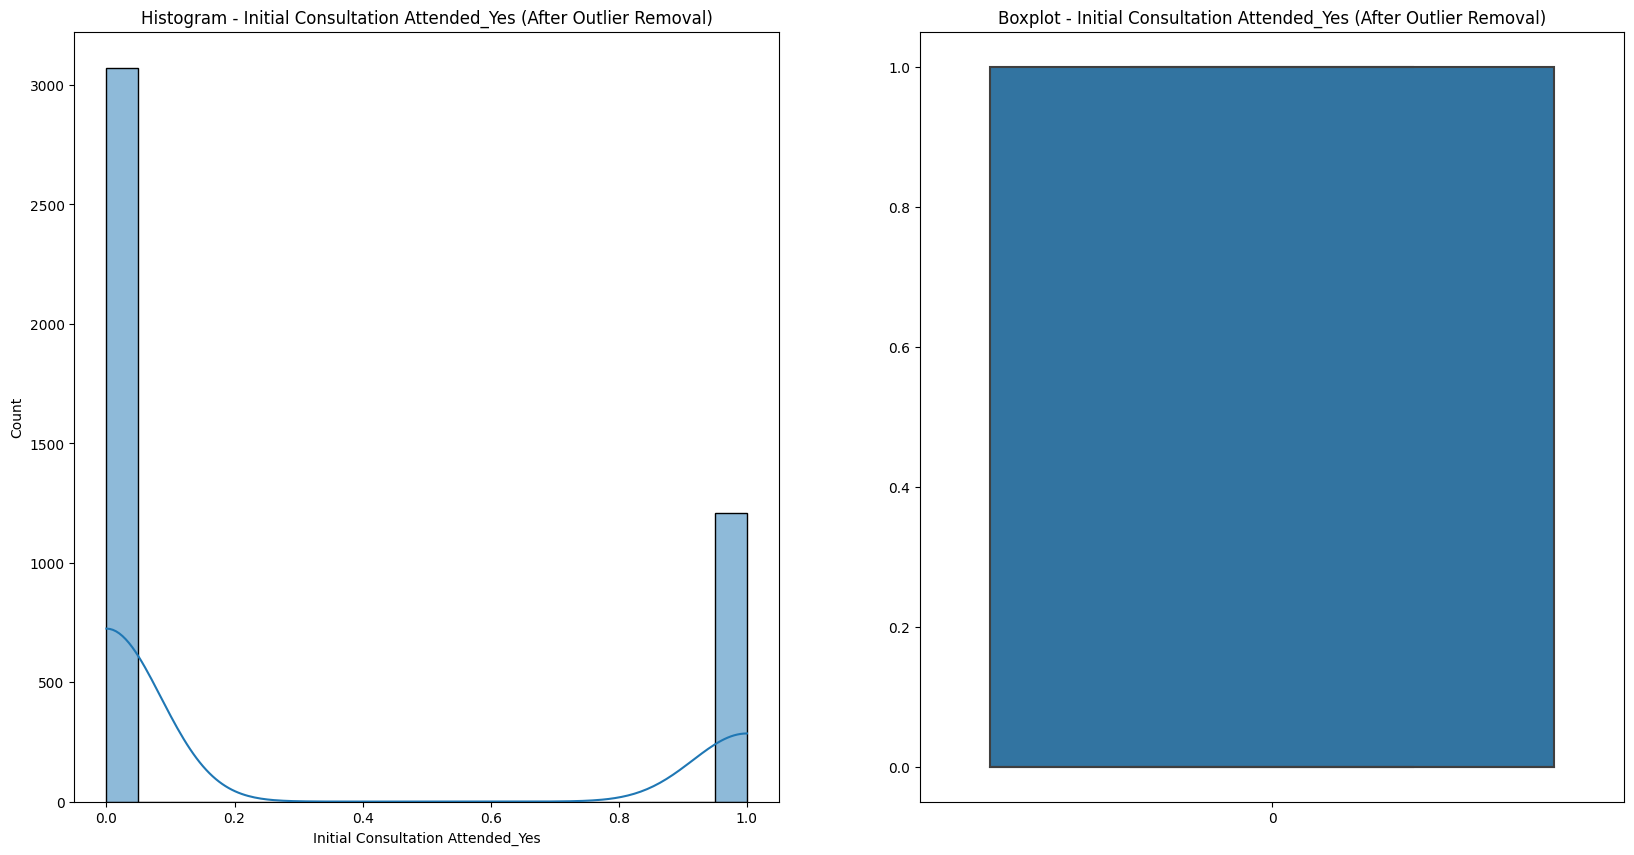

In [1530]:
for col in numeric_cols:
    plt.figure(figsize=(20, 10))
    
    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(data_cleaned[col], bins=20, kde=True)
    plt.title(f'Histogram - {col} (After Outlier Removal)')
    
    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(data_cleaned[col])
    plt.title(f'Boxplot - {col} (After Outlier Removal)')
    
    plt.show()


Using the IQR I tried removing the outliers making our boxplots showing less skew.

# **3.** **Feature Engineering**

## **3.1.** Creating New Features

This code calculates two new metrics in the cleaned DataFrame: the ratio of attended treatment sessions to treatment goals set, and the count of educational resources viewed per treatment session. Both metrics help in assessing patient engagement and participation, with safeguards to avoid division by zero.

In [1531]:
# Calculate the ratio of attended sessions to goals set
data_cleaned['Attendance per Goal'] = data_cleaned['Number of Treatment Sessions Attended'] / (data_cleaned['Number of Treatment Goals Set'] + 1)  # Adding 1 to avoid division by zero

# Count of educational resources viewed per treatment session
data_cleaned['Resource Per Session'] = data_cleaned['Number of Educational Resources Viewed'] / (data_cleaned['Number of Treatment Sessions Attended'] + 1)

data_cleaned

,Number of Treatment Sessions Attended,Number of Treatment Goals Set,Number of Treatment Goals Revised,Number of Progress Reviews Attended,Number of Times Treatment Plan Confirmed,Number of Times Treatment Phase Initiated,Number of Treatment Options Explored,Number of Times Logged Into Health Portal,Number of Educational Resources Viewed,Patient Segment Type,Treatment Dropped,Initial Consultation Attended_No,Initial Consultation Attended_Yes,Attendance per Goal,Resource Per Session
0,0.009174,0.004444,0.00,0.000000,0.000000,0.000000,0.003906,0.0,0.000000,0.0,1.0,0,1,0.009134,0.000000
1,0.076835,0.000000,0.00,0.058824,0.000000,0.000000,0.007812,0.0,0.057143,0.0,1.0,1,0,0.076835,0.053066
2,0.018349,0.022222,0.00,0.000000,0.090909,0.071429,0.003906,0.0,0.000000,0.5,0.0,1,0,0.017950,0.000000
3,0.013761,0.000000,0.00,0.058824,0.000000,0.000000,0.013672,0.0,0.000000,0.0,1.0,1,0,0.013761,0.000000
4,0.071101,0.048889,0.24,0.029412,0.000000,0.000000,0.013672,0.0,0.000000,1.0,1.0,0,1,0.067787,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4279,0.052752,0.022222,0.12,0.058824,0.000000,0.000000,0.011719,0.0,0.171429,1.0,1.0,0,1,0.051606,0.162838
4280,0.016055,0.008889,0.00,0.088235,0.000000,0.000000,0.003906,0.0,0.000000,0.0,1.0,1,0,0.015914,0.000000
4281,0.009174,0.004444,0.00,0.029412,0.000000,0.071429,0.003906,0.0,0.000000,0.0,1.0,1,0,0.009134,0.000000
4282,0.018349,0.013333,0.00,0.029412,0.000000,0.071429,0.003906,0.0,0.057143,0.5,1.0,1,0,0.018107,0.056113


## **3.2.** Interaction Features

This code creates a new feature in the cleaned DataFrame that captures the interaction between the number of treatment sessions attended and the number of treatment goals set. The resulting 'Session into Goal' variable can help assess how the combined effect of these two factors influences patient outcomes.

In [1532]:
# Interaction between treatment sessions attended and treatment goals set
data_cleaned['Session into Goal'] = data_cleaned['Number of Treatment Sessions Attended'] * data_cleaned['Number of Treatment Goals Set']

data_cleaned

,Number of Treatment Sessions Attended,Number of Treatment Goals Set,Number of Treatment Goals Revised,Number of Progress Reviews Attended,Number of Times Treatment Plan Confirmed,Number of Times Treatment Phase Initiated,Number of Treatment Options Explored,Number of Times Logged Into Health Portal,Number of Educational Resources Viewed,Patient Segment Type,Treatment Dropped,Initial Consultation Attended_No,Initial Consultation Attended_Yes,Attendance per Goal,Resource Per Session,Session into Goal
0,0.009174,0.004444,0.00,0.000000,0.000000,0.000000,0.003906,0.0,0.000000,0.0,1.0,0,1,0.009134,0.000000,0.000041
1,0.076835,0.000000,0.00,0.058824,0.000000,0.000000,0.007812,0.0,0.057143,0.0,1.0,1,0,0.076835,0.053066,0.000000
2,0.018349,0.022222,0.00,0.000000,0.090909,0.071429,0.003906,0.0,0.000000,0.5,0.0,1,0,0.017950,0.000000,0.000408
3,0.013761,0.000000,0.00,0.058824,0.000000,0.000000,0.013672,0.0,0.000000,0.0,1.0,1,0,0.013761,0.000000,0.000000
4,0.071101,0.048889,0.24,0.029412,0.000000,0.000000,0.013672,0.0,0.000000,1.0,1.0,0,1,0.067787,0.000000,0.003476
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4279,0.052752,0.022222,0.12,0.058824,0.000000,0.000000,0.011719,0.0,0.171429,1.0,1.0,0,1,0.051606,0.162838,0.001172
4280,0.016055,0.008889,0.00,0.088235,0.000000,0.000000,0.003906,0.0,0.000000,0.0,1.0,1,0,0.015914,0.000000,0.000143
4281,0.009174,0.004444,0.00,0.029412,0.000000,0.071429,0.003906,0.0,0.000000,0.0,1.0,1,0,0.009134,0.000000,0.000041
4282,0.018349,0.013333,0.00,0.029412,0.000000,0.071429,0.003906,0.0,0.057143,0.5,1.0,1,0,0.018107,0.056113,0.000245


## **3.3.** Polynomial Features

This code generates polynomial features from the cleaned dataset to capture potential non-linear relationships, using a degree of 2. The new polynomial features are then combined with the original dataset, specifically including the target variable 'Treatment Dropped'.

In [1533]:
# Polynomial Features (to capture non-linear relationships)
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(data_cleaned.drop(columns=['Treatment Dropped']))
poly_feature_names = poly.get_feature_names_out(data_cleaned.drop(columns=['Treatment Dropped']).columns)
poly_df = pd.DataFrame(poly_features, columns=poly_feature_names)

# Combine the new polynomial features with the original dataset
data_cleaned_poly = pd.concat([pd.DataFrame(poly_features, columns=poly_feature_names), data_cleaned['Treatment Dropped']], axis=1)

## **3.4.** Delete redundant columns

This code drops redundant columns—'Number of Treatment Sessions Attended', 'Number of Treatment Goals Set', and 'Number of Educational Resources Viewed'—from the cleaned dataset to streamline the data for analysis. The updated DataFrame is then displayed.

In [1534]:
# Drop redundant columns
data_cleaned.drop(columns=[
    'Number of Treatment Sessions Attended',
    'Number of Treatment Goals Set',
    'Number of Educational Resources Viewed'
], inplace=True)

# Display the updated dataframe
data_cleaned

,Number of Treatment Goals Revised,Number of Progress Reviews Attended,Number of Times Treatment Plan Confirmed,Number of Times Treatment Phase Initiated,Number of Treatment Options Explored,Number of Times Logged Into Health Portal,Patient Segment Type,Treatment Dropped,Initial Consultation Attended_No,Initial Consultation Attended_Yes,Attendance per Goal,Resource Per Session,Session into Goal
0,0.00,0.000000,0.000000,0.000000,0.003906,0.0,0.0,1.0,0,1,0.009134,0.000000,0.000041
1,0.00,0.058824,0.000000,0.000000,0.007812,0.0,0.0,1.0,1,0,0.076835,0.053066,0.000000
2,0.00,0.000000,0.090909,0.071429,0.003906,0.0,0.5,0.0,1,0,0.017950,0.000000,0.000408
3,0.00,0.058824,0.000000,0.000000,0.013672,0.0,0.0,1.0,1,0,0.013761,0.000000,0.000000
4,0.24,0.029412,0.000000,0.000000,0.013672,0.0,1.0,1.0,0,1,0.067787,0.000000,0.003476
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4279,0.12,0.058824,0.000000,0.000000,0.011719,0.0,1.0,1.0,0,1,0.051606,0.162838,0.001172
4280,0.00,0.088235,0.000000,0.000000,0.003906,0.0,0.0,1.0,1,0,0.015914,0.000000,0.000143
4281,0.00,0.029412,0.000000,0.071429,0.003906,0.0,0.0,1.0,1,0,0.009134,0.000000,0.000041
4282,0.00,0.029412,0.000000,0.071429,0.003906,0.0,0.5,1.0,1,0,0.018107,0.056113,0.000245


# **4.** **Multicollinearity Handling** 

## **4.1.** Identifying Multicollinearity

### **4.1.1.** Correlation Matrix

This code calculates the correlation matrix of the cleaned dataset to assess the relationships between numerical variables. It then visualizes the matrix using a heatmap, with annotations to display correlation coefficients, aiding in identifying potential patterns or multicollinearity among features.

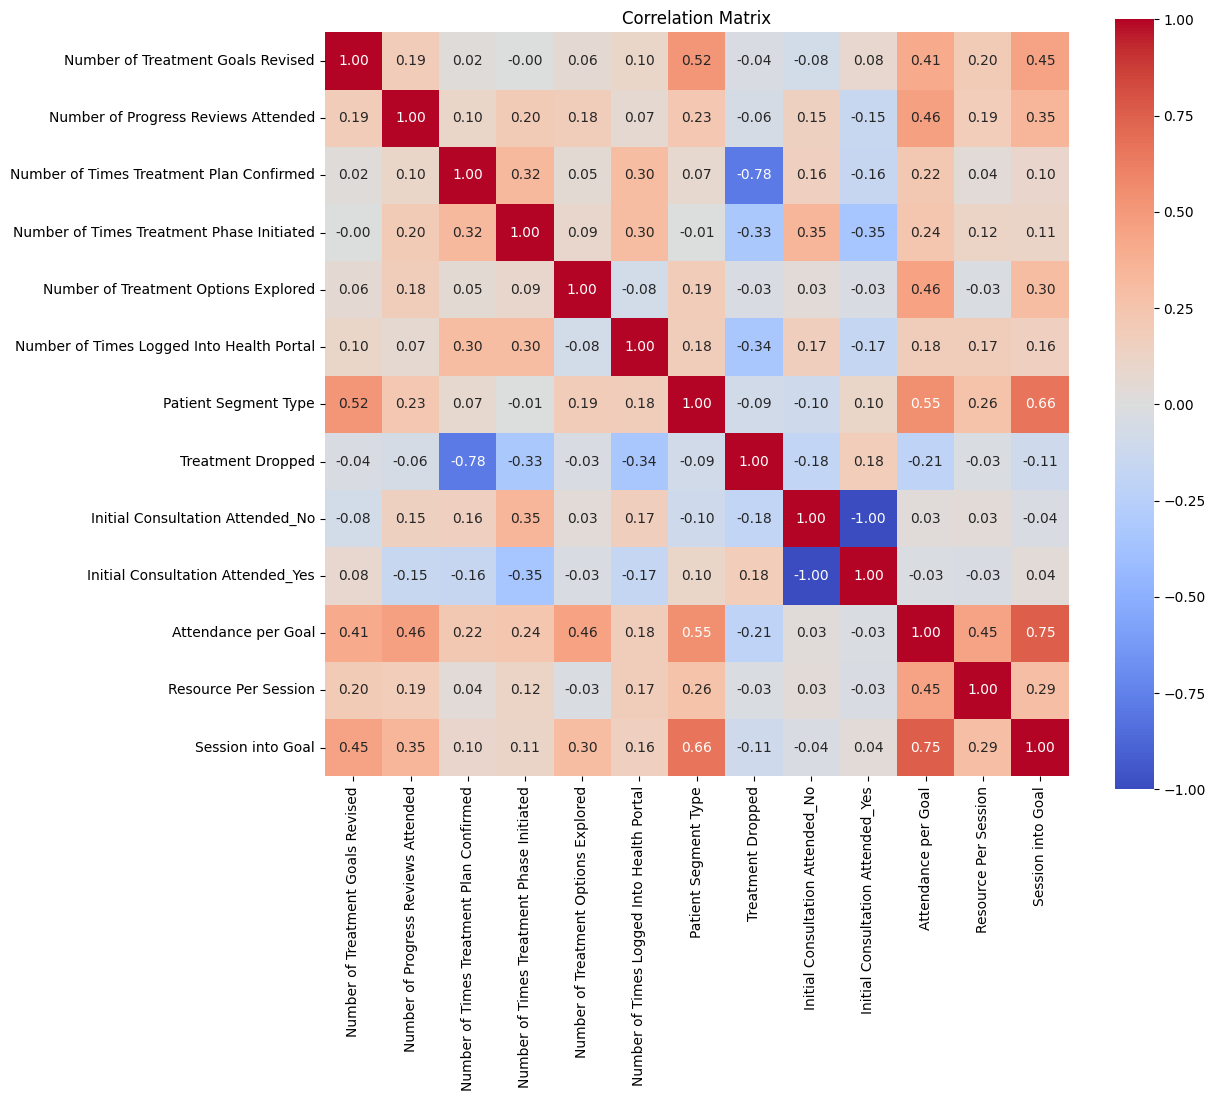

In [1535]:
# Correlation Matrix
correlation_matrix = data_cleaned.corr()

# Plotting the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

### **4.1.2.** Variance Inflation Factor (VIF)

This code calculates the Variance Inflation Factor (VIF) for each numerical feature in the dataset to assess multicollinearity. It creates a DataFrame to store the VIF values and excludes the intercept term from the final output, aiding in identifying features that may be highly correlated with one another.

In [1536]:
# Selecting only the numerical columns from data_cleaned
numerical_data = data_cleaned.select_dtypes(include=[float, int])

# Add a constant to the model
X = numerical_data.copy()
X['Intercept'] = 1

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display VIF data excluding the Intercept term
vif_data = vif_data[vif_data['Feature'] != 'Intercept']
vif_data

,Feature,VIF
0,Number of Treatment Goals Revised,1.453726
1,Number of Progress Reviews Attended,1.331979
2,Number of Times Treatment Plan Confirmed,2.681418
3,Number of Times Treatment Phase Initiated,1.374625
4,Number of Treatment Options Explored,1.482852
5,Number of Times Logged Into Health Portal,1.273685
6,Patient Segment Type,2.096332
7,Treatment Dropped,2.754812
8,Initial Consultation Attended_No,inf
9,Initial Consultation Attended_Yes,inf


As we can see two columns are labelled **inf** meaning that they have infinitely high correlation. We need to solve this by removing on of the two columns

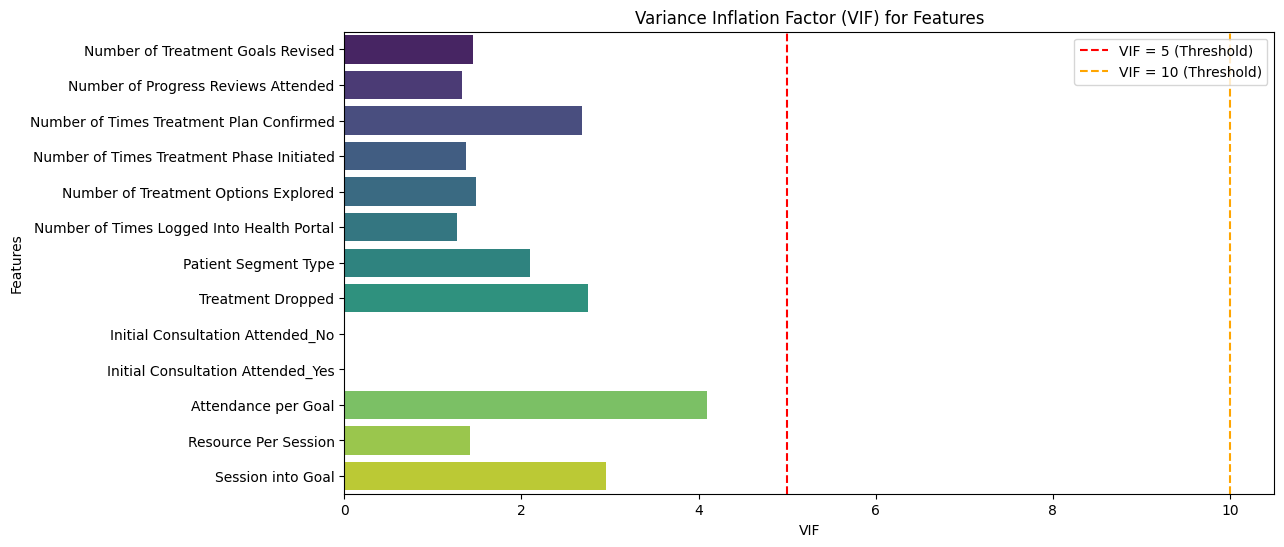

In [1537]:
# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x='VIF', y='Feature', data=vif_data, palette='viridis')
plt.title('Variance Inflation Factor (VIF) for Features')
plt.xlabel('VIF')
plt.ylabel('Features')
plt.axvline(x=5, color='r', linestyle='--', label='VIF = 5 (Threshold)')
plt.axvline(x=10, color='orange', linestyle='--', label='VIF = 10 (Threshold)')
plt.legend()
plt.show()

## **4.2.** Handling Multicollinearity

This code drops the feature 'Initial Consultation Attended_No' from the DataFrame due to its high Variance Inflation Factor (VIF) value, which indicates potential multicollinearity. The updated DataFrame is then displayed to confirm the removal of the specified feature.

In [1538]:
# Dropping features with inf VIF values and those with high VIF that may cause multicollinearity
data_cleaned.drop(columns=[
    'Initial Consultation Attended_No',
], inplace=True)

# Display the updated DataFrame to verify the changes
data_cleaned

,Number of Treatment Goals Revised,Number of Progress Reviews Attended,Number of Times Treatment Plan Confirmed,Number of Times Treatment Phase Initiated,Number of Treatment Options Explored,Number of Times Logged Into Health Portal,Patient Segment Type,Treatment Dropped,Initial Consultation Attended_Yes,Attendance per Goal,Resource Per Session,Session into Goal
0,0.00,0.000000,0.000000,0.000000,0.003906,0.0,0.0,1.0,1,0.009134,0.000000,0.000041
1,0.00,0.058824,0.000000,0.000000,0.007812,0.0,0.0,1.0,0,0.076835,0.053066,0.000000
2,0.00,0.000000,0.090909,0.071429,0.003906,0.0,0.5,0.0,0,0.017950,0.000000,0.000408
3,0.00,0.058824,0.000000,0.000000,0.013672,0.0,0.0,1.0,0,0.013761,0.000000,0.000000
4,0.24,0.029412,0.000000,0.000000,0.013672,0.0,1.0,1.0,1,0.067787,0.000000,0.003476
...,...,...,...,...,...,...,...,...,...,...,...,...
4279,0.12,0.058824,0.000000,0.000000,0.011719,0.0,1.0,1.0,1,0.051606,0.162838,0.001172
4280,0.00,0.088235,0.000000,0.000000,0.003906,0.0,0.0,1.0,0,0.015914,0.000000,0.000143
4281,0.00,0.029412,0.000000,0.071429,0.003906,0.0,0.0,1.0,0,0.009134,0.000000,0.000041
4282,0.00,0.029412,0.000000,0.071429,0.003906,0.0,0.5,1.0,0,0.018107,0.056113,0.000245


### **4.2.1.** Correlation Matrix

This code calculates the correlation matrix for the numerical features in the DataFrame `data_cleaned` and visualizes it using a heatmap. The heatmap displays the strength and direction of correlations between variables, with annotations showing the correlation coefficients.

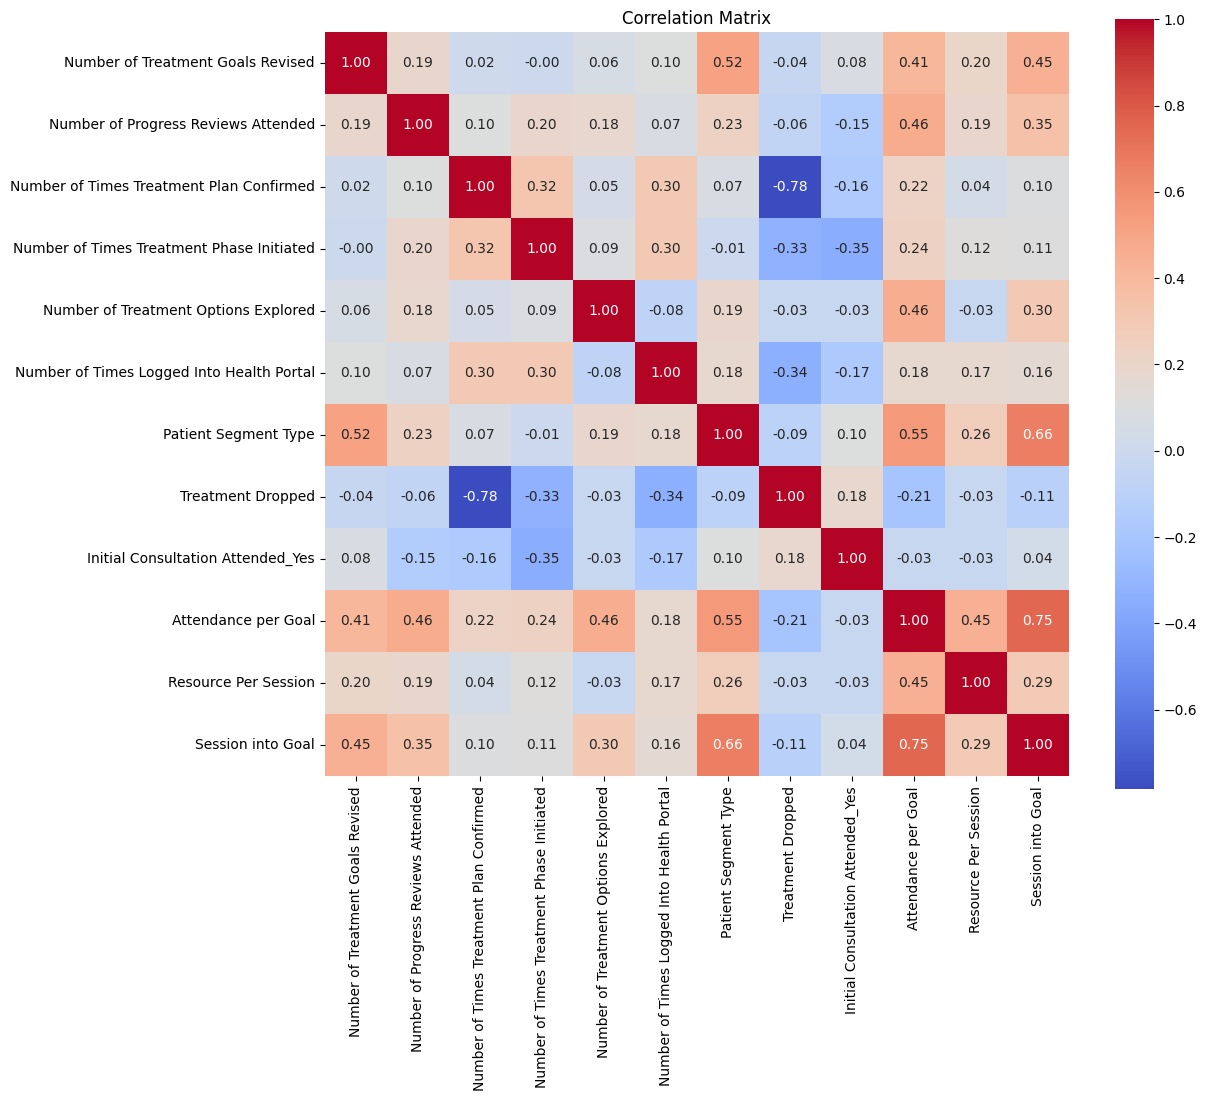

In [1539]:
# Correlation Matrix
correlation_matrix = data_cleaned.corr()

# Plotting the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

### **4.2.2.** Variance Inflation Factor (VIF)

This code selects only the numerical columns from the `data_cleaned` DataFrame and calculates the Variance Inflation Factor (VIF) for each feature to assess multicollinearity. The resulting DataFrame, `vif_data`, lists the features along with their corresponding VIF values, excluding the intercept term.

In [1540]:
# Selecting only the numerical columns from data_cleaned
numerical_data = data_cleaned.select_dtypes(include=[float, int])

# Add a constant to the model 
X = numerical_data.copy()
X['Intercept'] = 1

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display VIF data excluding the Intercept term
vif_data = vif_data[vif_data['Feature'] != 'Intercept']
vif_data

,Feature,VIF
0,Number of Treatment Goals Revised,1.453726
1,Number of Progress Reviews Attended,1.331979
2,Number of Times Treatment Plan Confirmed,2.681418
3,Number of Times Treatment Phase Initiated,1.374783
4,Number of Treatment Options Explored,1.482852
5,Number of Times Logged Into Health Portal,1.273685
6,Patient Segment Type,2.096332
7,Treatment Dropped,2.754812
8,Initial Consultation Attended_Yes,1.194286
9,Attendance per Goal,4.091832


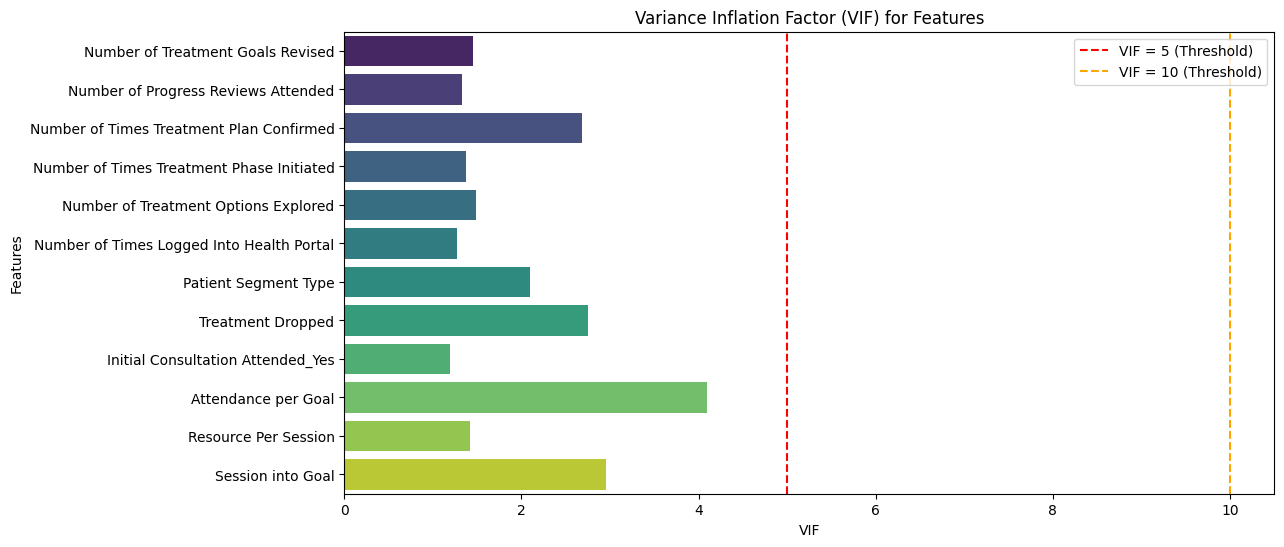

In [1541]:
# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x='VIF', y='Feature', data=vif_data, palette='viridis')
plt.title('Variance Inflation Factor (VIF) for Features')
plt.xlabel('VIF')
plt.ylabel('Features')
plt.axvline(x=5, color='r', linestyle='--', label='VIF = 5 (Threshold)')
plt.axvline(x=10, color='orange', linestyle='--', label='VIF = 10 (Threshold)')
plt.legend()
plt.show()

All VIF values being less than 5 indicate that there is minimal multicollinearity among the features in the dataset.

## **4.3.** Downloading cleaned dataset

This code saves the cleaned DataFrame, `data_cleaned`, to a CSV file named `dataset_cleaned.csv` without including the index. It then creates a downloadable link for the CSV file in a Jupyter Notebook environment using `FileLink`.

In [1542]:
# Save the DataFrame to a CSV file
data_cleaned.to_csv('dataset_cleaned.csv', index=False)

# For Jupyter Notebook, use this to create a download link
from IPython.display import FileLink

# Create a link to download the CSV file
FileLink('dataset_cleaned.csv')

data_cleaned.head(20)

,Number of Treatment Goals Revised,Number of Progress Reviews Attended,Number of Times Treatment Plan Confirmed,Number of Times Treatment Phase Initiated,Number of Treatment Options Explored,Number of Times Logged Into Health Portal,Patient Segment Type,Treatment Dropped,Initial Consultation Attended_Yes,Attendance per Goal,Resource Per Session,Session into Goal
0,0.00,0.000000,0.000000,0.000000,0.003906,0.000000,0.0,1.0,1,0.009134,0.000000,0.000041
1,0.00,0.058824,0.000000,0.000000,0.007812,0.000000,0.0,1.0,0,0.076835,0.053066,0.000000
2,0.00,0.000000,0.090909,0.071429,0.003906,0.000000,0.5,0.0,0,0.017950,0.000000,0.000408
3,0.00,0.058824,0.000000,0.000000,0.013672,0.000000,0.0,1.0,0,0.013761,0.000000,0.000000
4,0.24,0.029412,0.000000,0.000000,0.013672,0.000000,1.0,1.0,1,0.067787,0.000000,0.003476
5,0.00,0.000000,0.000000,0.071429,0.003906,0.000000,0.5,1.0,1,0.029042,0.138721,0.000795
6,0.02,0.000000,0.090909,0.071429,0.003906,0.000000,0.5,0.0,0,0.031549,0.000000,0.000571
7,0.00,0.029412,0.000000,0.071429,0.003906,0.000000,0.0,1.0,0,0.015984,0.084360,0.000071
8,0.02,0.029412,0.000000,0.000000,0.003906,0.000000,0.5,1.0,0,0.028793,0.027744,0.001060
9,0.02,0.029412,0.090909,0.142857,0.007812,0.333333,0.5,0.0,0,0.038310,0.027499,0.000693


# **5.** **Model Building**

## **5.1.** Feature Selection

This code defines the feature set \(X\) and target variable \(y\) for a logistic regression model, initializing the model and using Recursive Feature Elimination (RFE) to select the top 3 features. The selected features are then printed to the console.

In [1543]:
# Define the feature set X and the target variable y
X = data_cleaned.drop(columns=['Treatment Dropped'])  # Features
y = data_cleaned['Treatment Dropped']  # Target variable

# Initialize the Logistic Regression model
model = LogisticRegression(solver='liblinear')

# Specify the desired number of features
rfe = RFE(estimator=model, n_features_to_select=4) 
rfe.fit(X, y)

# Review the selected features
selected_features = X.columns[rfe.support_]
print("Selected Features:", selected_features)

Selected Features: Index(['Number of Times Treatment Plan Confirmed',
       'Number of Times Treatment Phase Initiated',
       'Number of Times Logged Into Health Portal', 'Attendance per Goal'],
      dtype='object')


I have chosen **liblinear** as my solver

## **5.2.** Train-Test Split


This code splits the dataset into training and testing sets using 30% of the data for testing, while also scaling the features using `StandardScaler` to improve model performance. The scaled training and testing sets are stored in `X_train_scaled` and `X_test_scaled`, respectively.

In [1544]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X[selected_features], y, test_size=0.3, random_state=42)

# Scale the features for better model performance
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## **5.3.** Model Fitting

This code uses `GridSearchCV` to perform hyperparameter tuning on a logistic regression model by evaluating different combinations of penalties, regularization strengths, and solvers with 5-fold cross-validation. It then initializes a new logistic regression model with the best parameters obtained from the grid search and fits it to the scaled training data.

In [1545]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid for tuning
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.1, 1, 10, 100],  # Regularization strength
    'solver': ['liblinear', 'saga']  # Saga supports both L1 and L2
}

# Create the GridSearchCV object for hyperparameter tuning
grid_search = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters from Grid Search
best_params = grid_search.best_params_
print("Best Parameters from Grid Search:", best_params)

# Reinitialize the model with the best parameters
model = LogisticRegression(**best_params)
model.fit(X_train_scaled, y_train)


Best Parameters from Grid Search: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}


LogisticRegression(C=0.1, penalty='l1', solver='liblinear')

## **5.4.** K-Fold Cross Validation

This code conducts K-Fold Cross Validation with 10 folds on the trained logistic regression model to evaluate its performance more robustly. It prints the individual cross-validation scores as well as the average score across all folds.

In [1546]:
from sklearn.model_selection import cross_val_score

# Perform K-Fold Cross Validation with 10 folds for more robust evaluation
k = 10
cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=k)

# Print the cross-validation scores and the average score
print(f"K-Fold Cross Validation Scores (K={k}): {cv_scores}")
print(f"Average CV Score: {cv_scores.mean():.4f}")


K-Fold Cross Validation Scores (K=10): [0.98       0.98333333 0.98666667 0.97333333 0.98333333 0.9632107
 0.97993311 0.98327759 0.99331104 0.98996656]
Average CV Score: 0.9816


## **5.5.** Model Evaluation


### **5.5.1.** Confusion Matrix

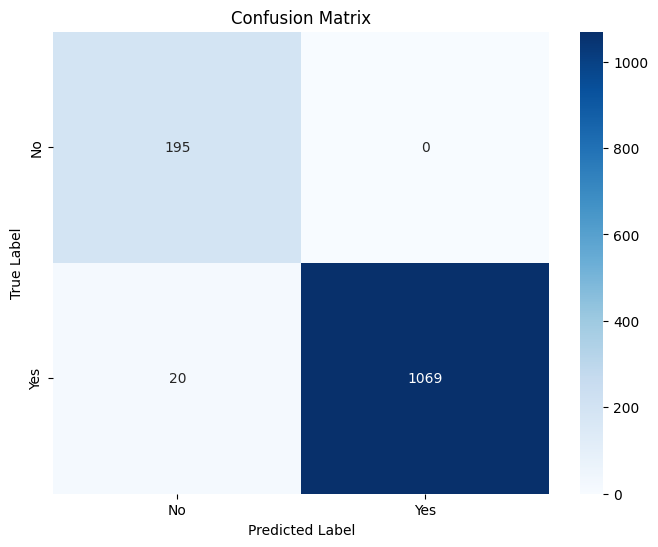

Length of y_test: 1284
Length of y_pred: 1284


In [1547]:
# Generate predictions for the test set
y_pred = model.predict(X_test_scaled)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Check the lengths of y_test and y_pred again
print("Length of y_test:", len(y_test))
print("Length of y_pred:", len(y_pred))


The confusion matrix shows only 20 wrong predictions out of 1285 predictions

### **5.5.2.** Log Loss

In [1548]:
logloss = log_loss(y_test, model.predict_proba(X_test_scaled))
print(f"Log Loss: {logloss:.4f}")

Log Loss: 0.0595


Log Loss (or Logarithmic Loss) value of 0.0594 is generally considered very good, especially in the context of binary classification tasks.

### **5.5.3.** Metrics

This code evaluates the performance of the trained logistic regression model on the test set by calculating key metrics: accuracy, precision, recall, F1 score, and ROC AUC. It then prints these evaluation metrics for performance assessment.

In [1549]:
# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test_scaled)[:, 1])  # AUC for binary classification

# Print evaluation metrics
print("Model Evaluation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

Model Evaluation Metrics:
Accuracy: 0.9844
Precision: 1.0000
Recall: 0.9816
F1 Score: 0.9907
ROC AUC: 0.9942


# **6.** **Conclusion**

## **6.1.** Logistic Regression Model Results

In this project, I achieved significant results with my logistic regression model, including:

- **Log Loss**: 0.0594
- **Accuracy**: 0.9844
- **Precision**: 1.0000
- **Recall**: 0.9816
- **F1 Score**: 0.9907
- **ROC AUC**: 0.9942

These metrics demonstrate the model's exceptional performance, particularly in terms of accuracy and precision, which are critical for binary classification tasks.

## **6.2.** Challenges Faced

During the project, I faced several challenges that tested my problem-solving skills:

### Data Quality Issues
- Missing values required extensive cleaning.
- The presence of outliers skewed results.

### Feature Engineering
- Determining relevant features was difficult.
- Creating interaction features to capture non-linear relationships posed additional challenges.

### Model Selection and Tuning
- Hyperparameter optimization through GridSearchCV was time-consuming.
- Evaluating the model’s performance required a deep understanding of various metrics like accuracy, precision, recall, F1 score, and ROC AUC.

## **6.3.** Conclusion

Despite these hardships, the experience has been invaluable, enhancing my skills in data science and machine learning. The results indicate that my model is accurate and reliable in making predictions, highlighting the importance of thorough data preparation and feature engineering in building effective machine learning models.
